In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

## Анализ

In [290]:
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [292]:
print('Проверка на пропущенные данные:')
df.isna().sum()

Проверка на пропущенные данные:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

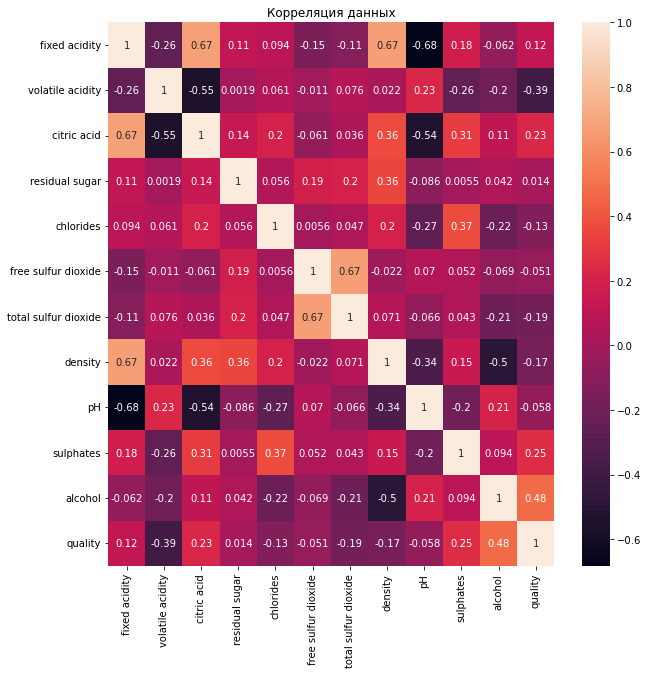

In [293]:
plt.figure(figsize=(10,10))
plt.title('Корреляция данных')
sns.heatmap(df.corr(),annot=True)
plt.show()

## Визуализация данных:

In [276]:
def visualization(df):
    for x in df:
        for y in df:
            if x != y:
                plt.figure(figsize=(10,10))
                print(x,'и',y,':')
                plt.scatter(df[x],df[y])
                plt.show()

fixed acidity и volatile acidity :


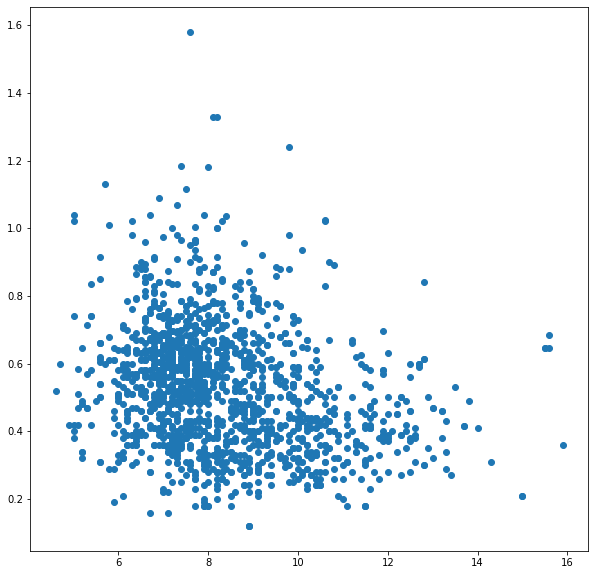

fixed acidity и citric acid :


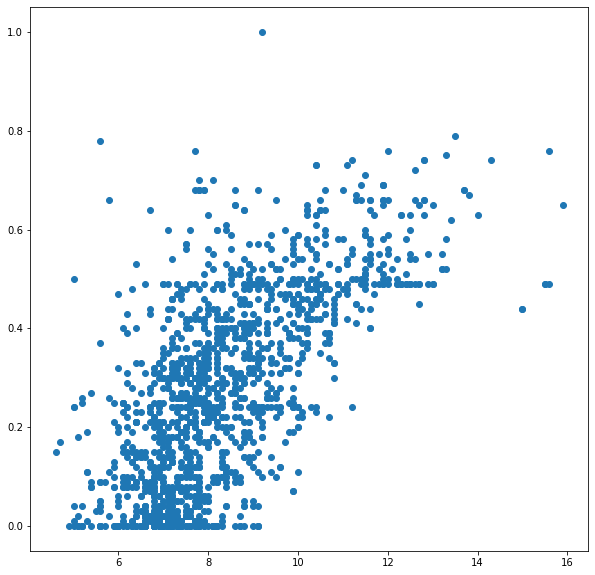

fixed acidity и residual sugar :


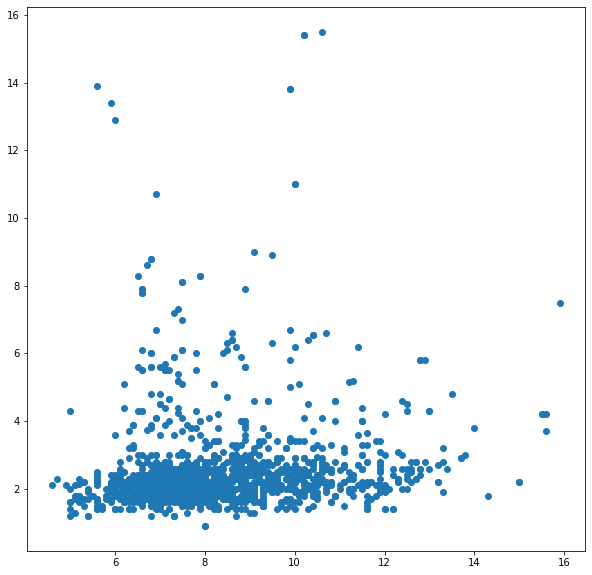

fixed acidity и chlorides :


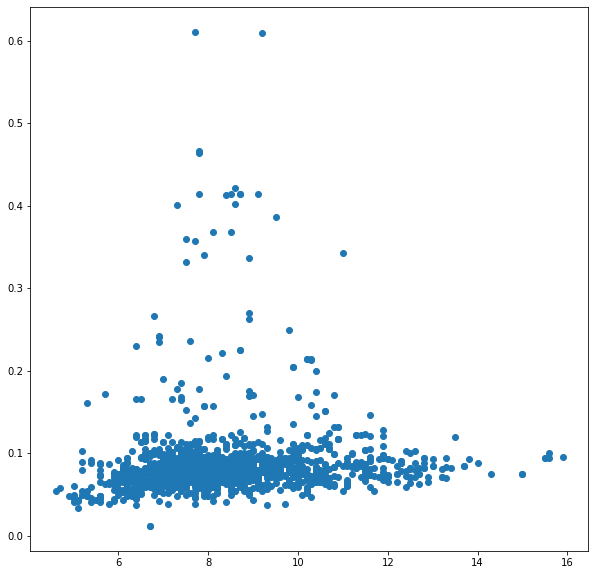

fixed acidity и free sulfur dioxide :


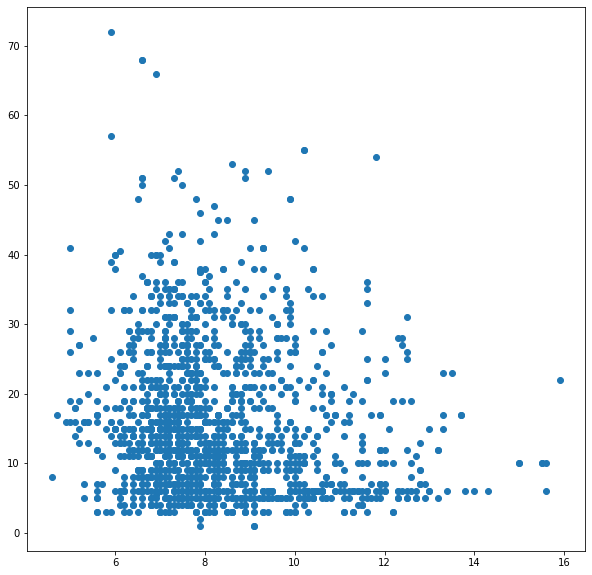

fixed acidity и total sulfur dioxide :


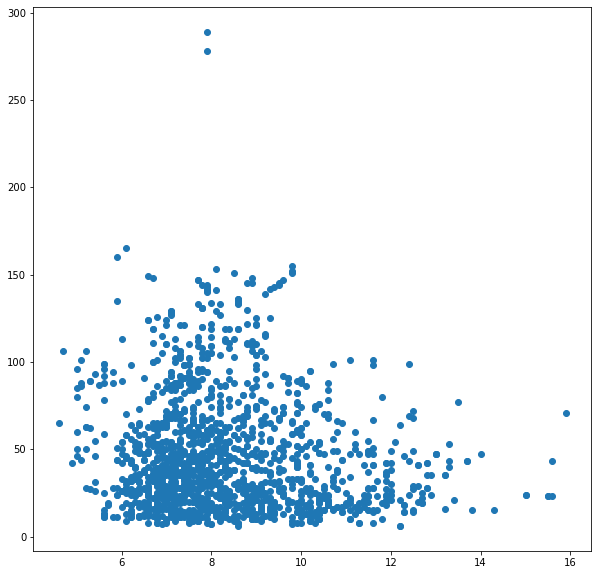

fixed acidity и density :


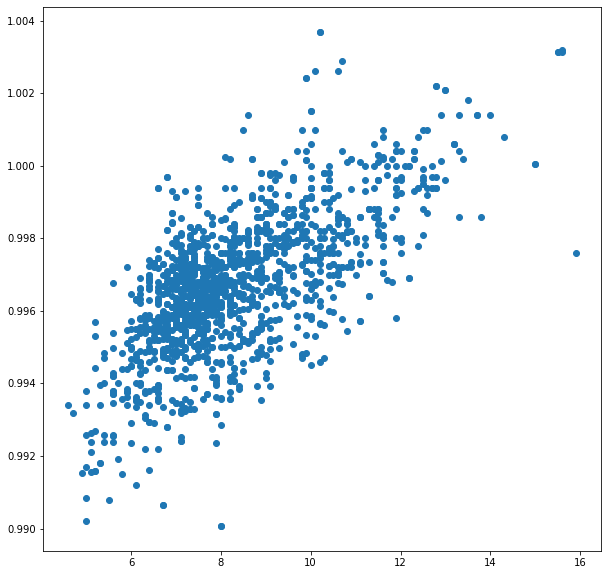

fixed acidity и pH :


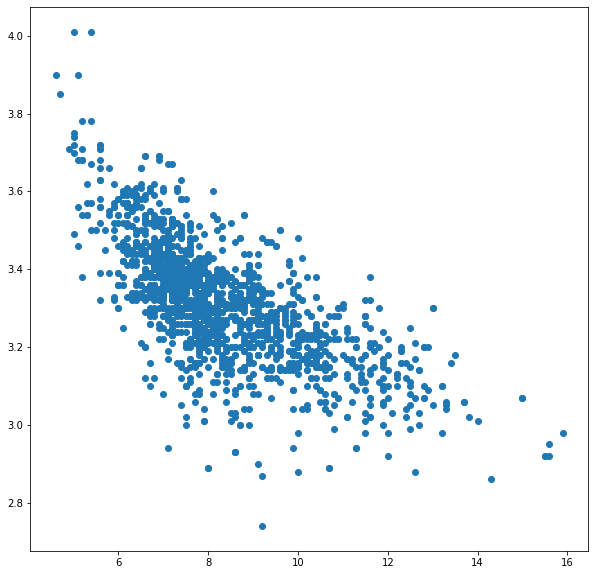

fixed acidity и sulphates :


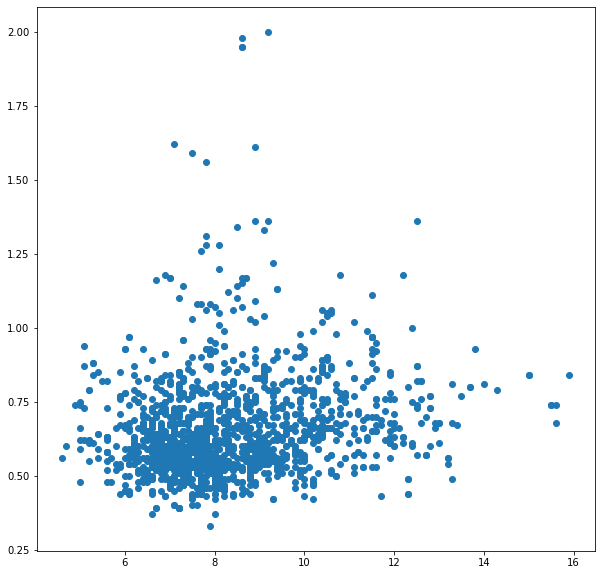

fixed acidity и alcohol :


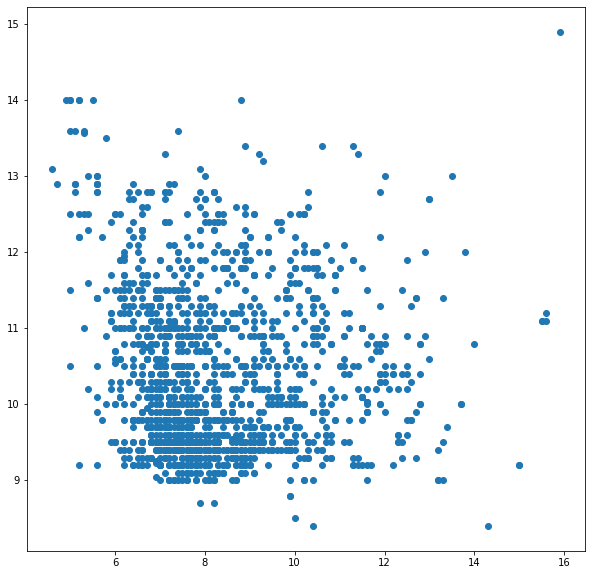

fixed acidity и quality :


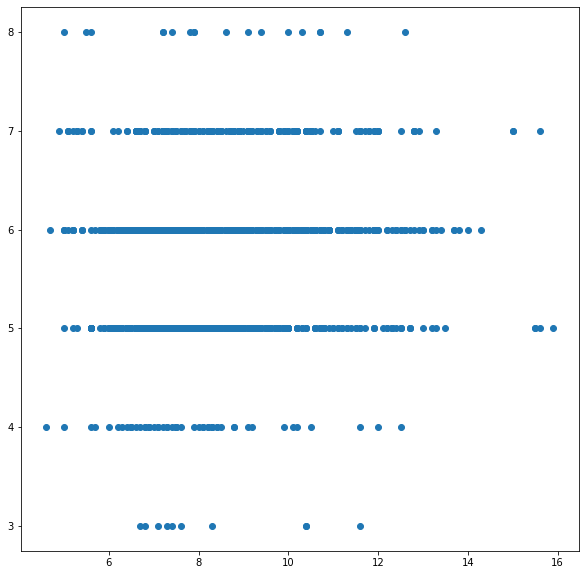

volatile acidity и fixed acidity :


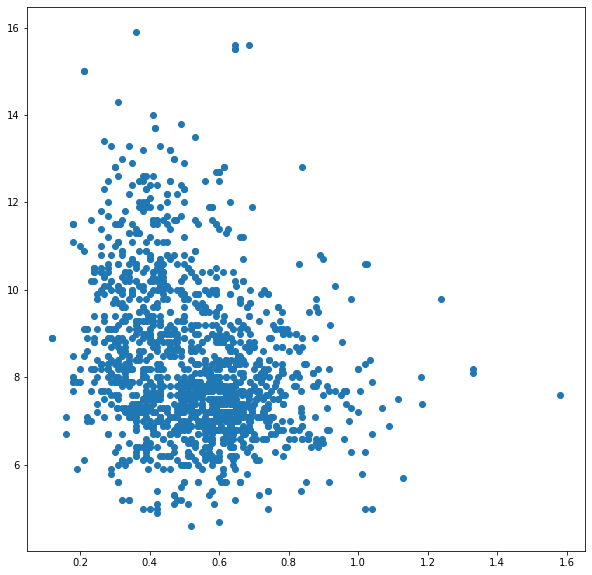

volatile acidity и citric acid :


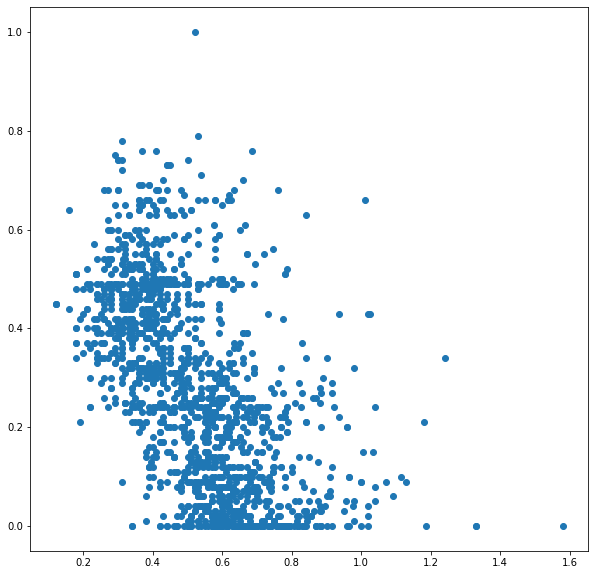

volatile acidity и residual sugar :


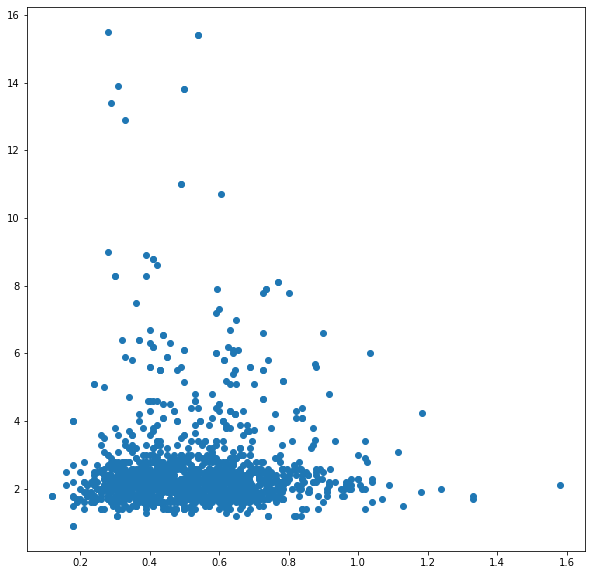

volatile acidity и chlorides :


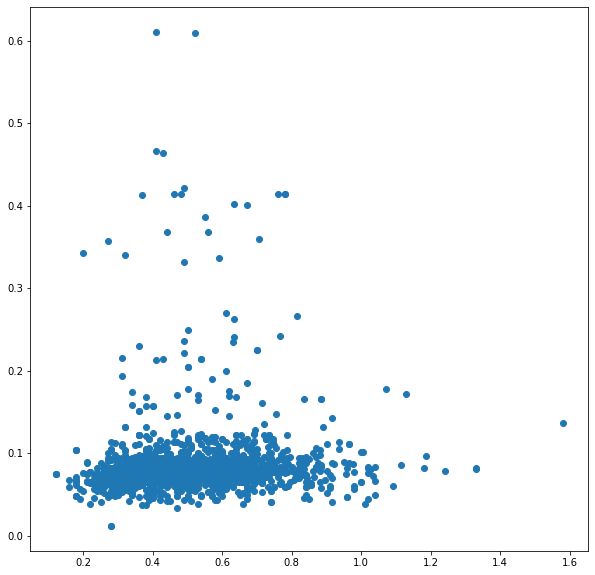

volatile acidity и free sulfur dioxide :


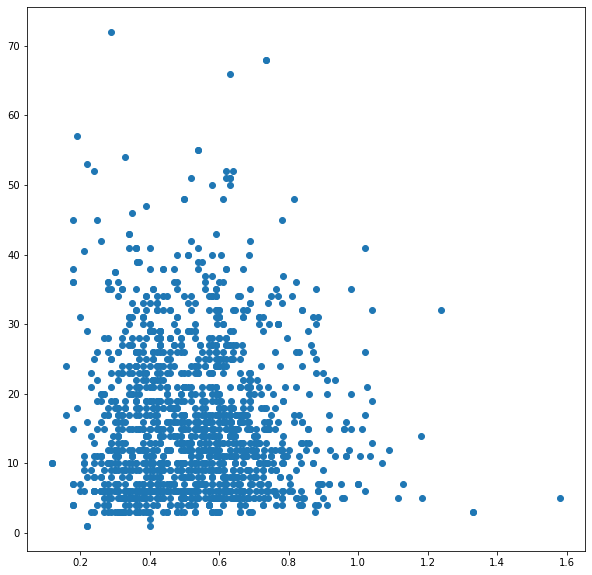

volatile acidity и total sulfur dioxide :


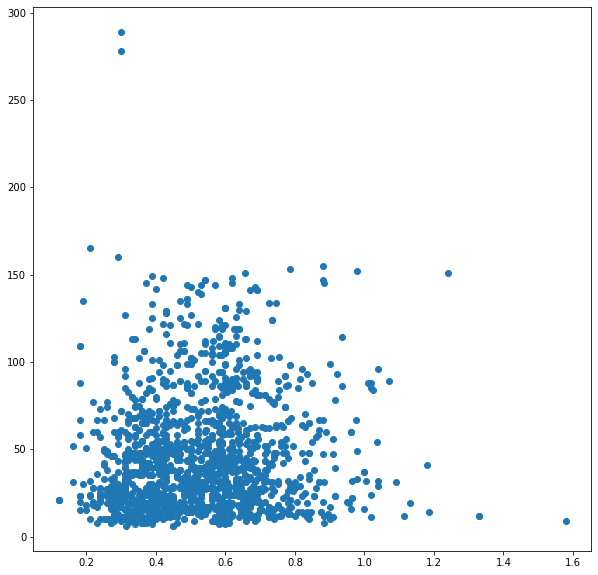

volatile acidity и density :


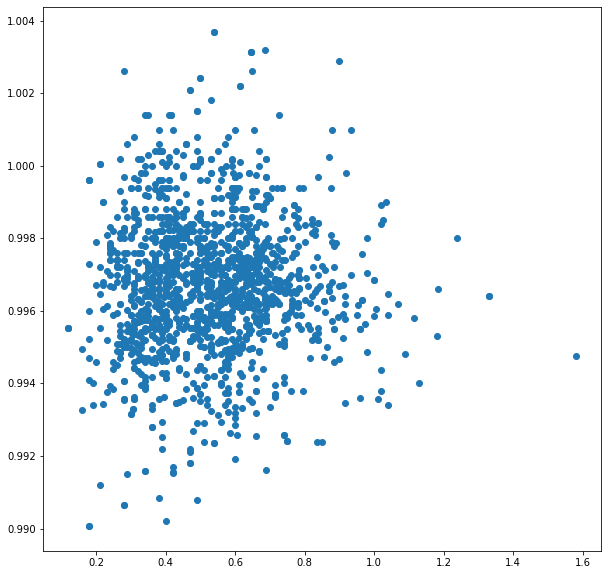

volatile acidity и pH :


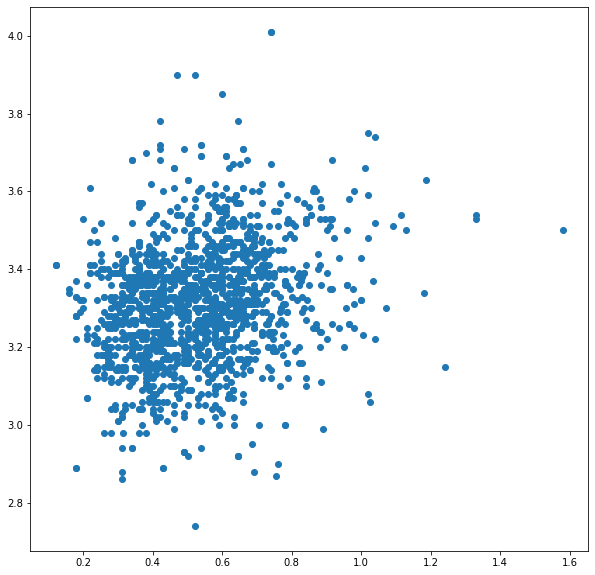

volatile acidity и sulphates :


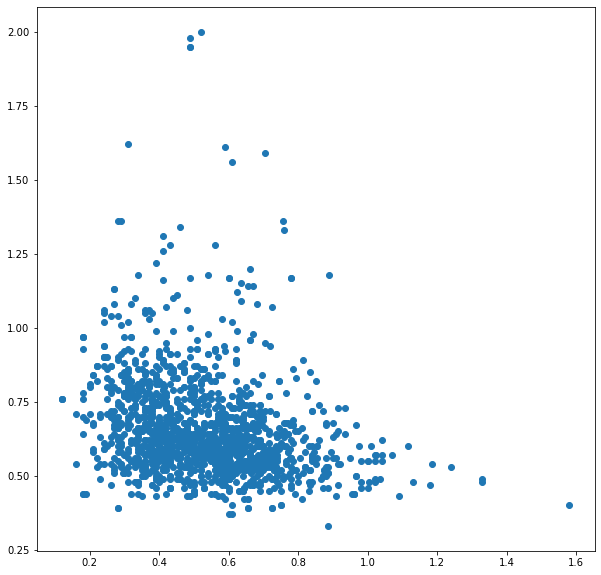

volatile acidity и alcohol :


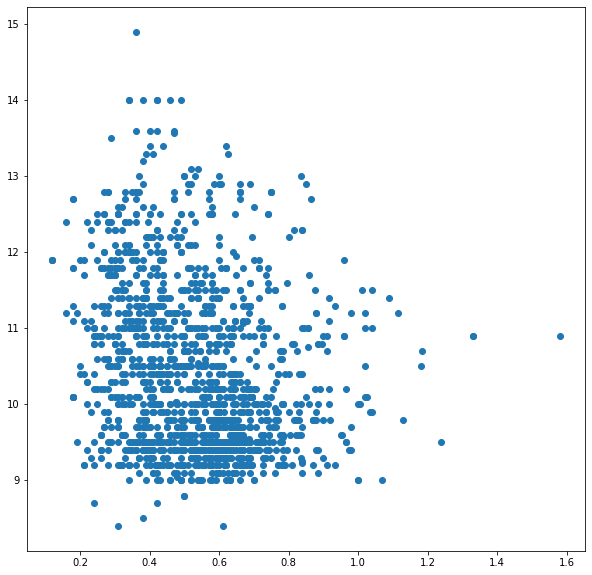

volatile acidity и quality :


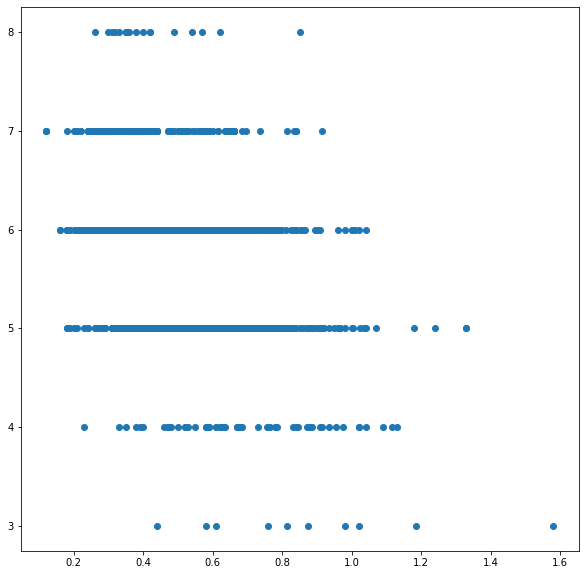

citric acid и fixed acidity :


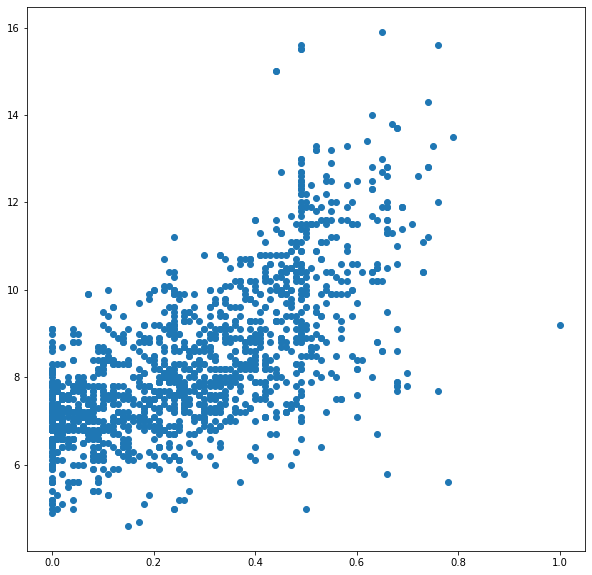

citric acid и volatile acidity :


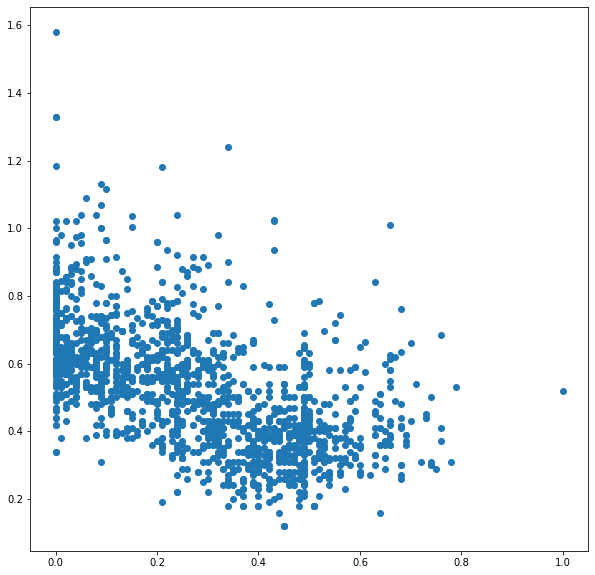

citric acid и residual sugar :


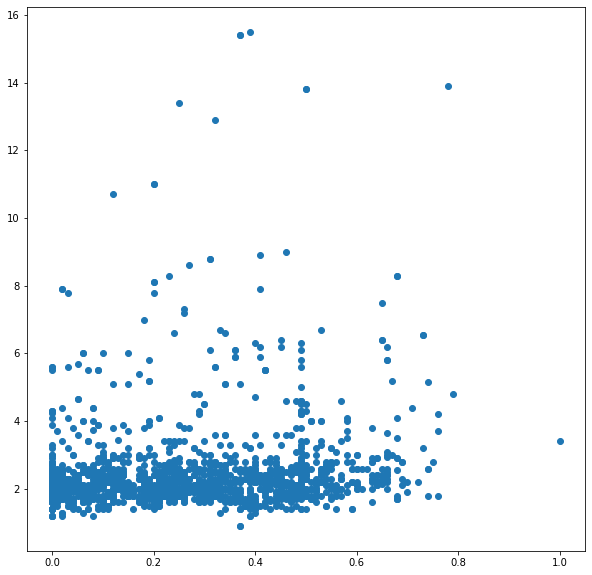

citric acid и chlorides :


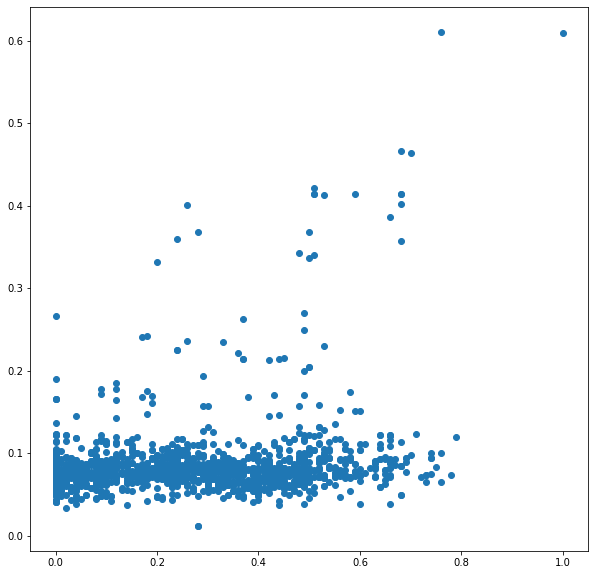

citric acid и free sulfur dioxide :


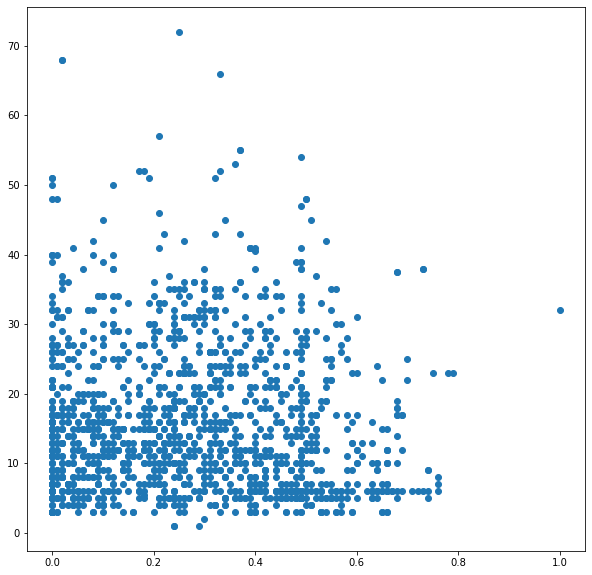

citric acid и total sulfur dioxide :


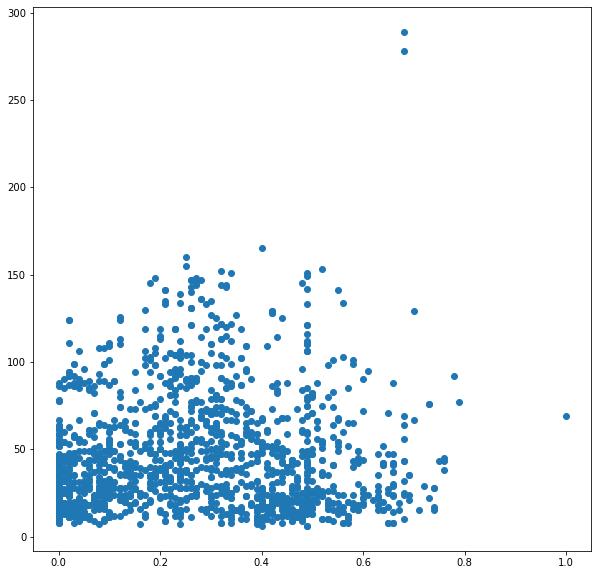

citric acid и density :


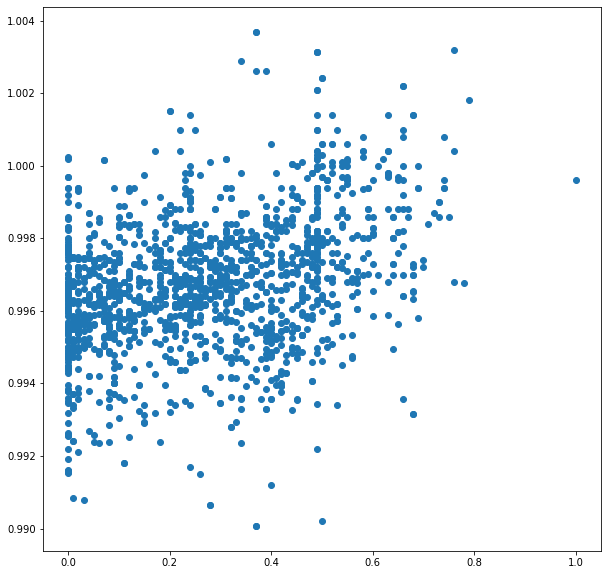

citric acid и pH :


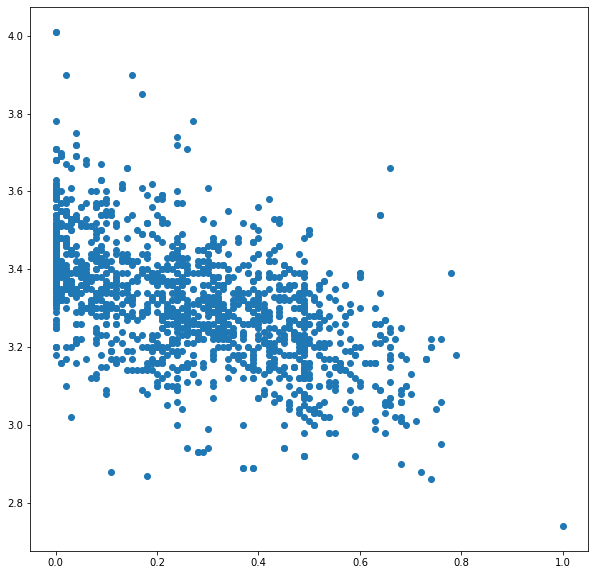

citric acid и sulphates :


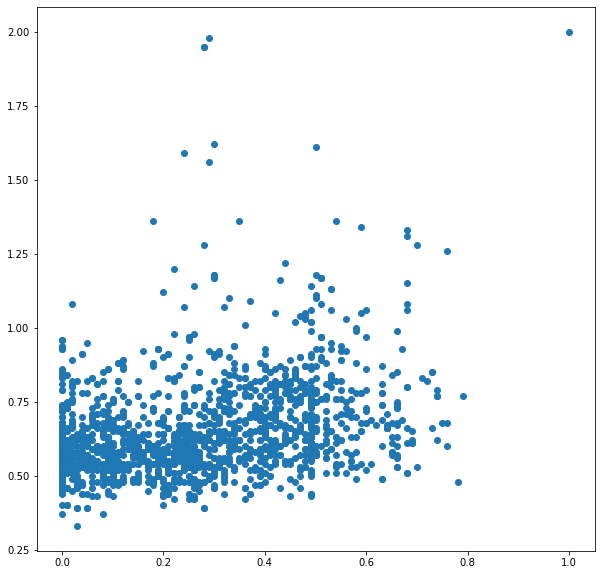

citric acid и alcohol :


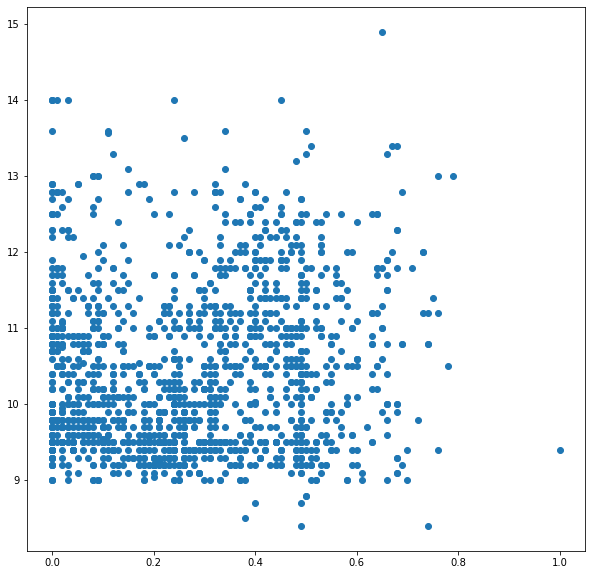

citric acid и quality :


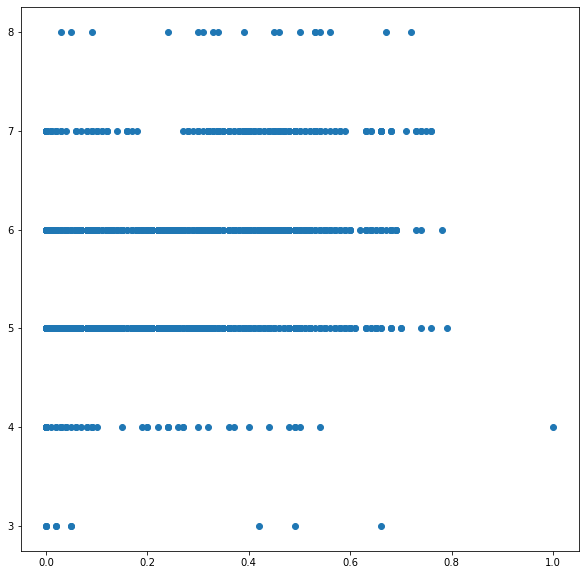

residual sugar и fixed acidity :


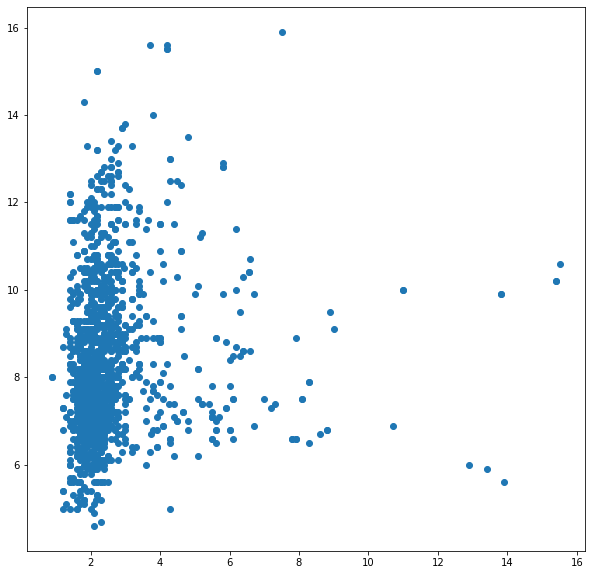

residual sugar и volatile acidity :


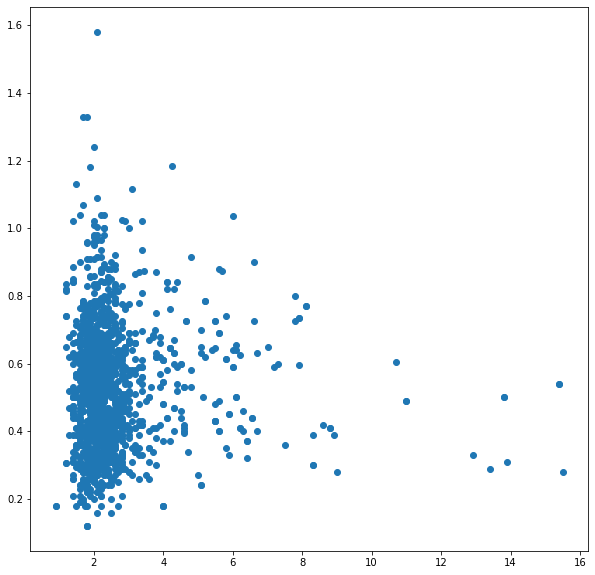

residual sugar и citric acid :


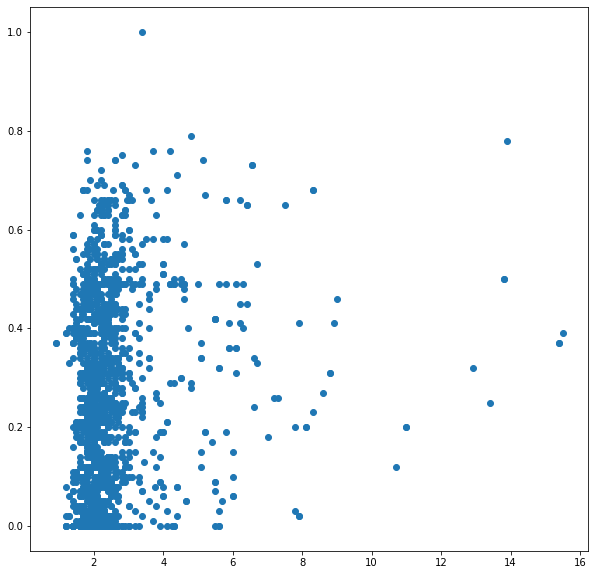

residual sugar и chlorides :


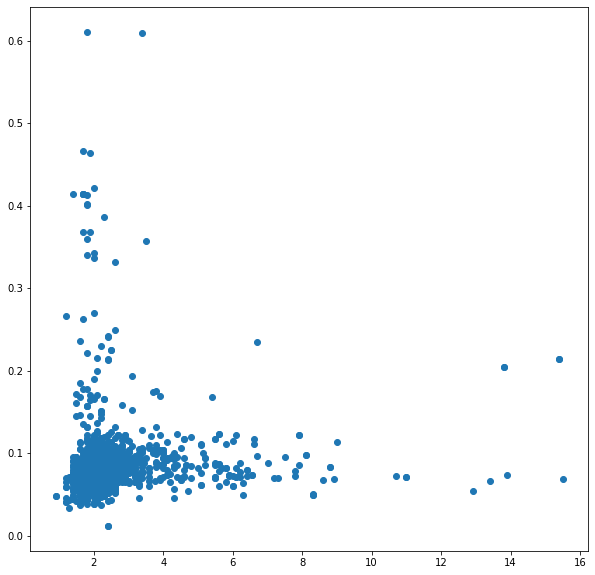

residual sugar и free sulfur dioxide :


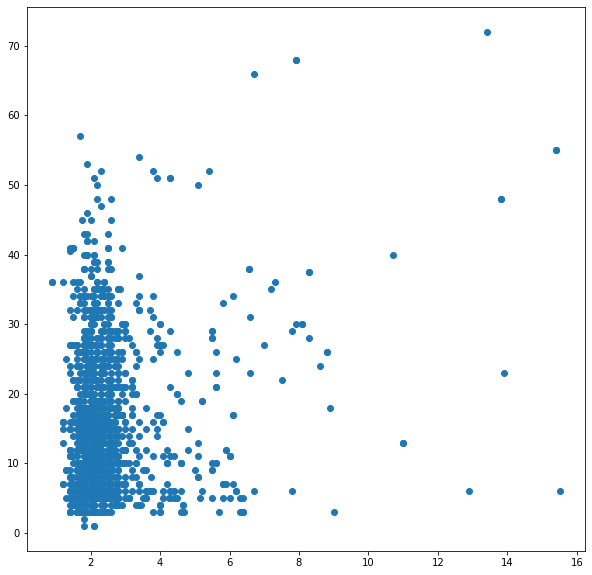

residual sugar и total sulfur dioxide :


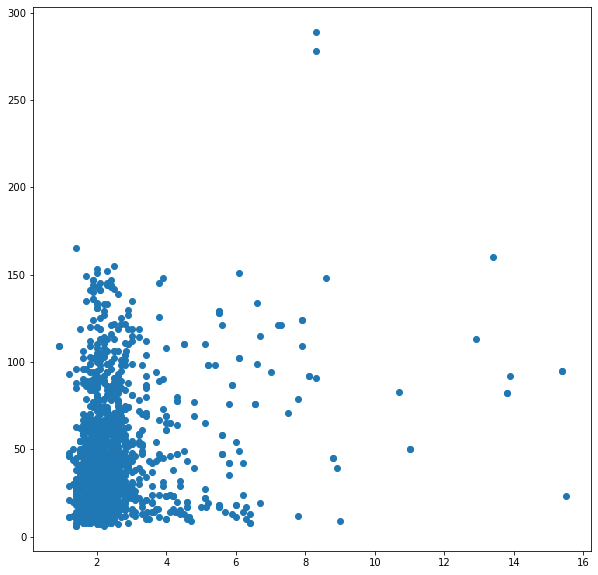

residual sugar и density :


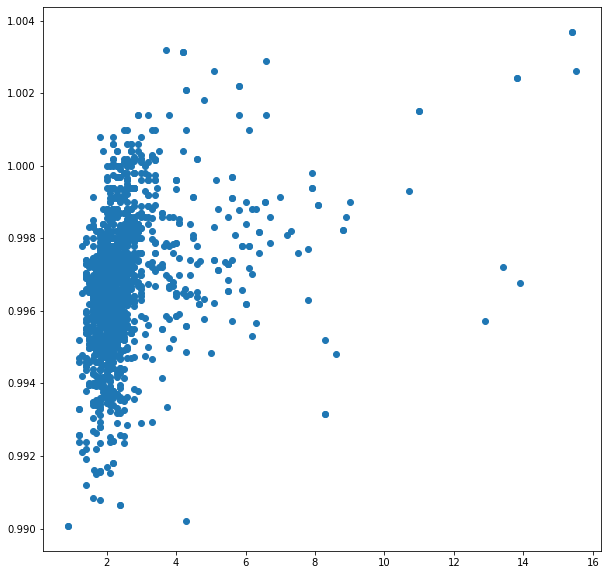

residual sugar и pH :


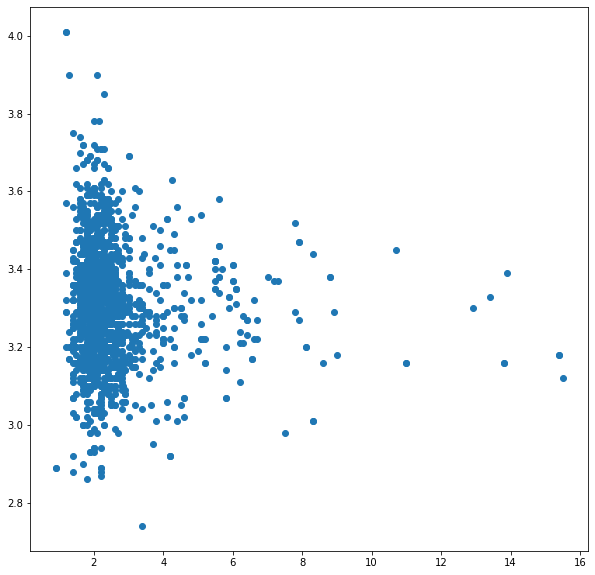

residual sugar и sulphates :


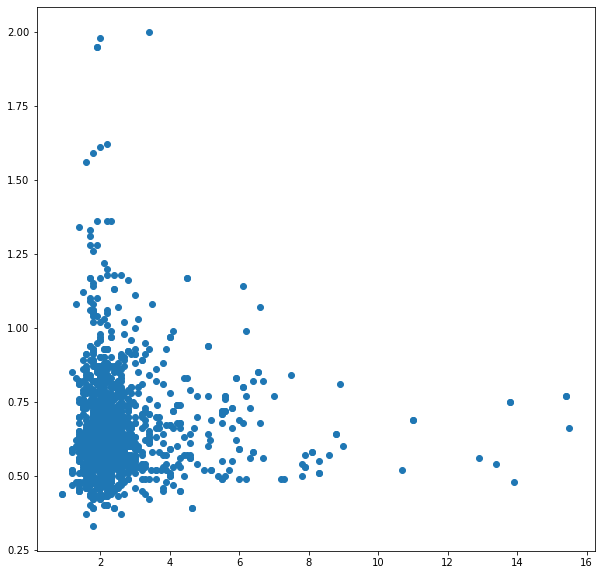

residual sugar и alcohol :


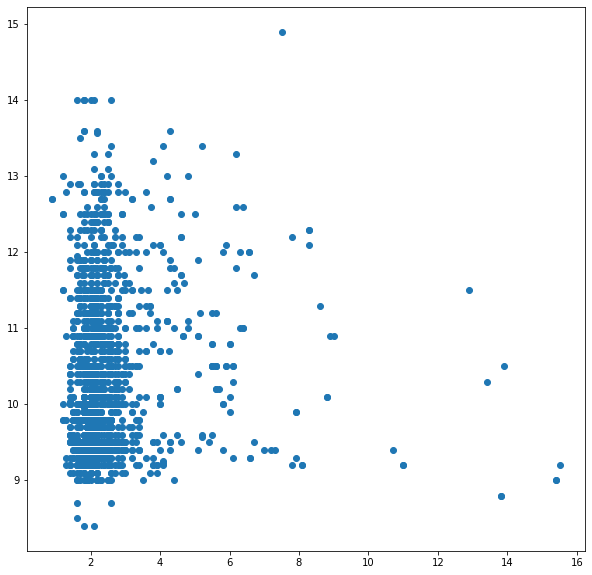

residual sugar и quality :


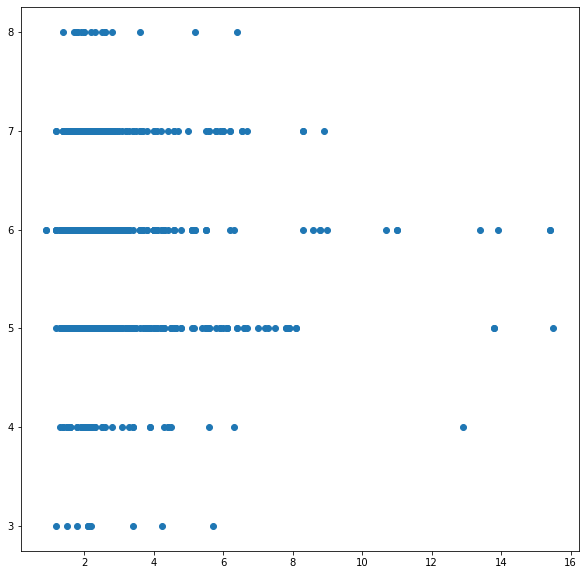

chlorides и fixed acidity :


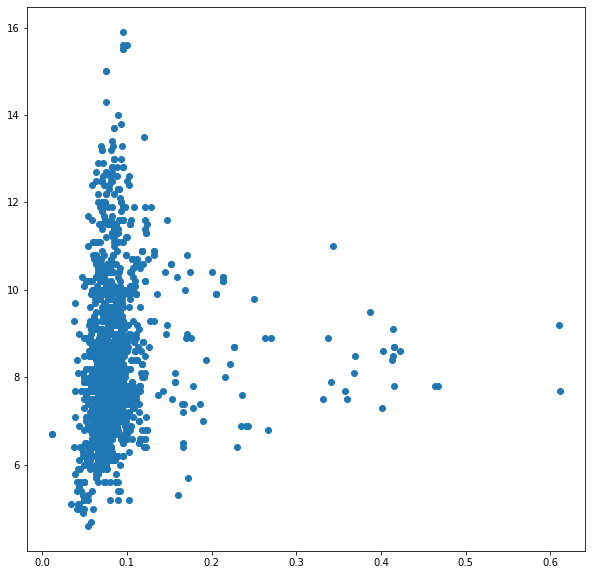

chlorides и volatile acidity :


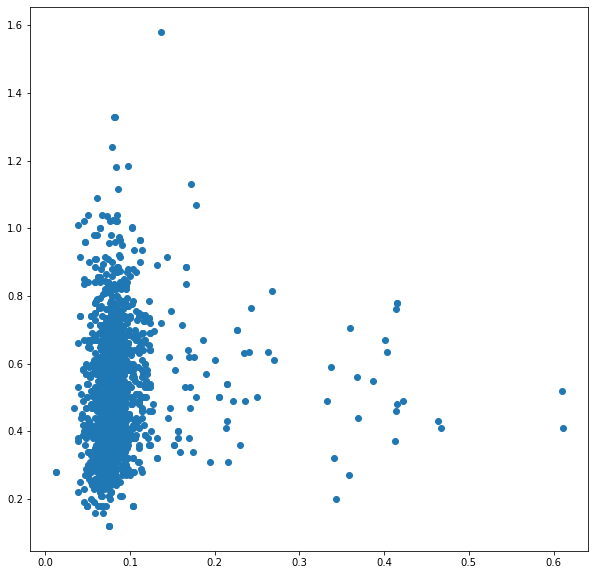

chlorides и citric acid :


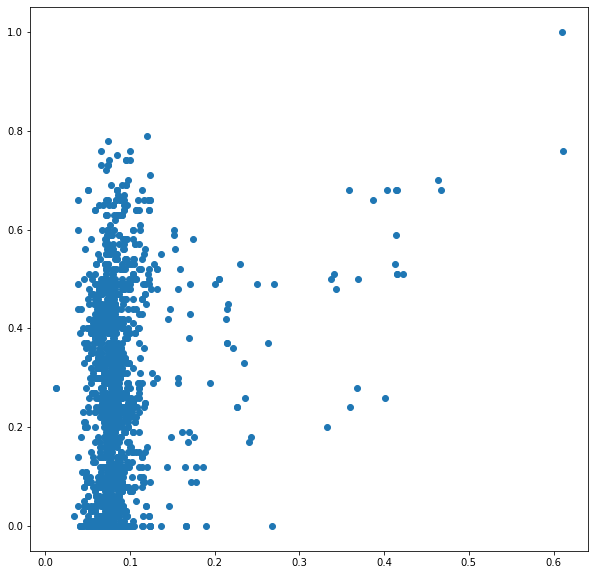

chlorides и residual sugar :


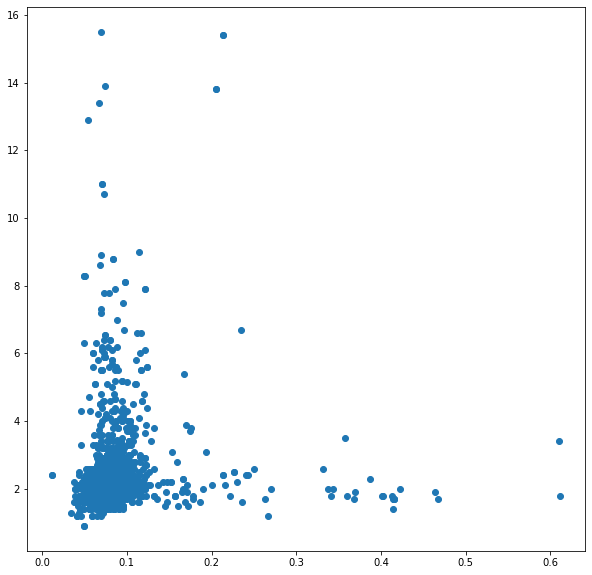

chlorides и free sulfur dioxide :


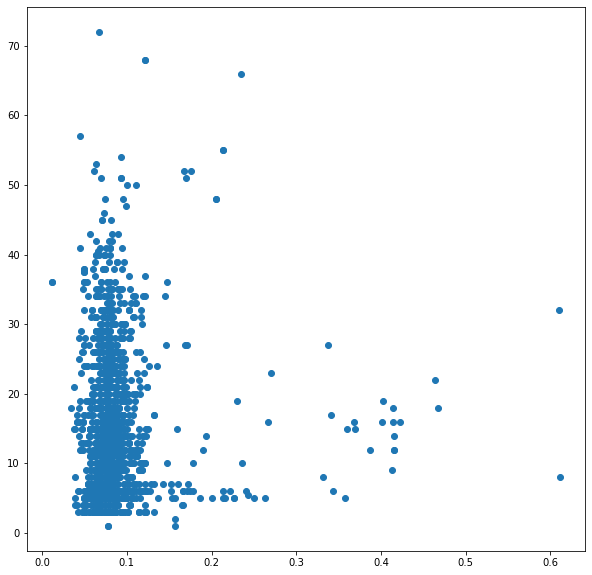

chlorides и total sulfur dioxide :


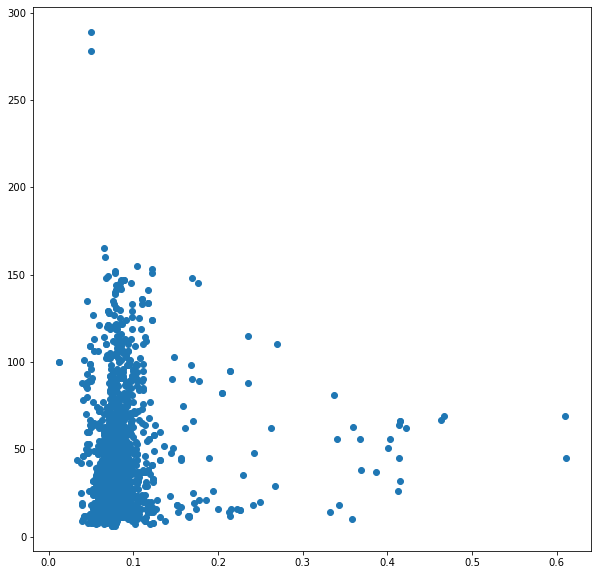

chlorides и density :


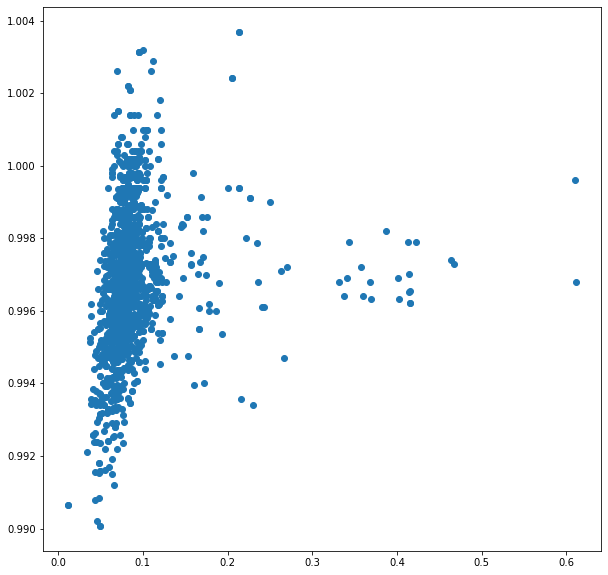

chlorides и pH :


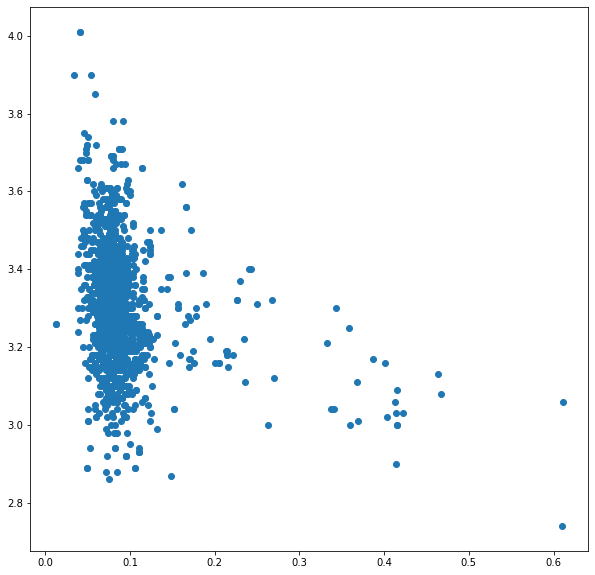

chlorides и sulphates :


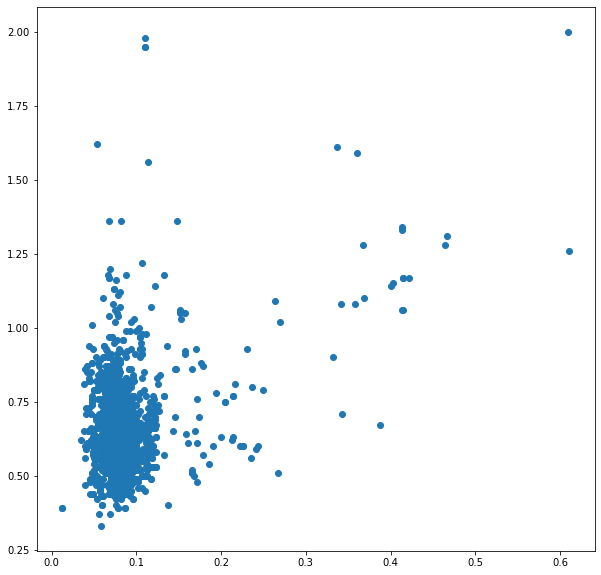

chlorides и alcohol :


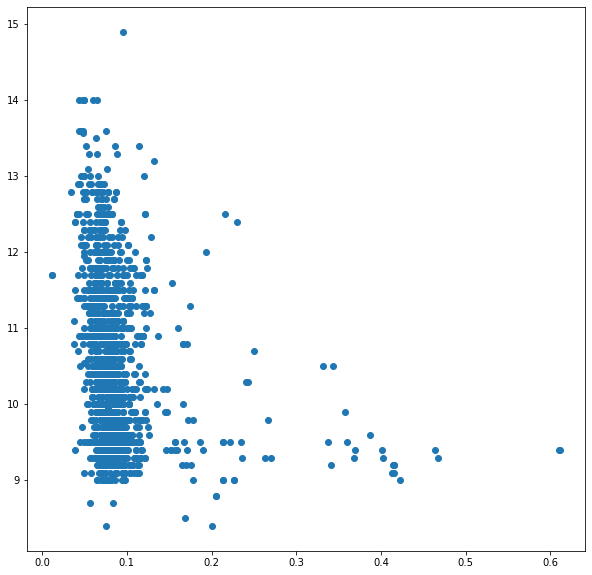

chlorides и quality :


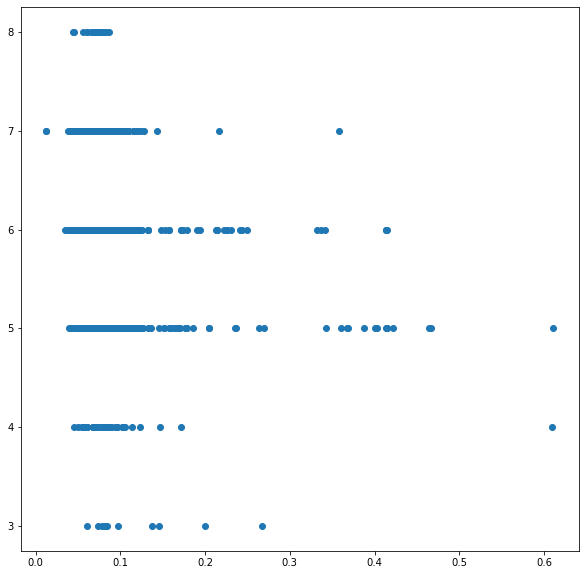

free sulfur dioxide и fixed acidity :


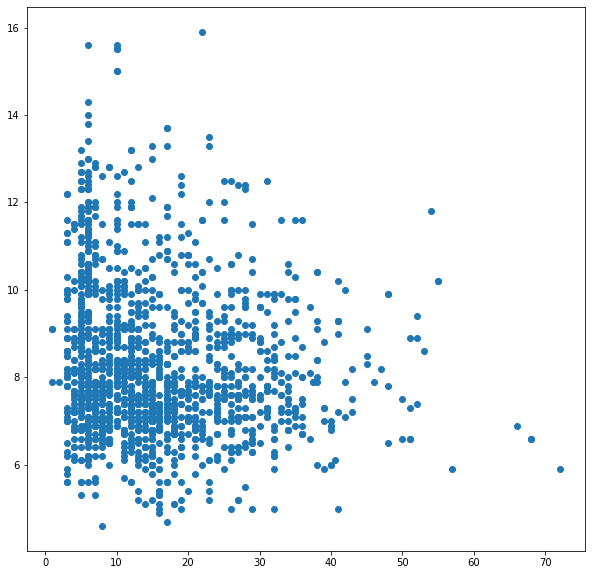

free sulfur dioxide и volatile acidity :


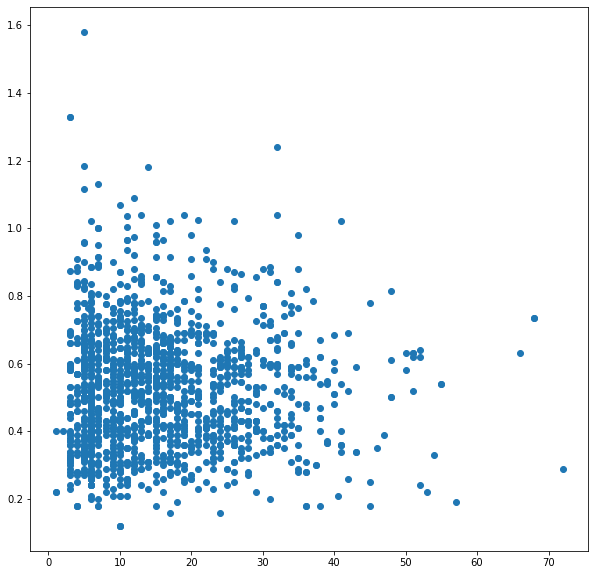

free sulfur dioxide и citric acid :


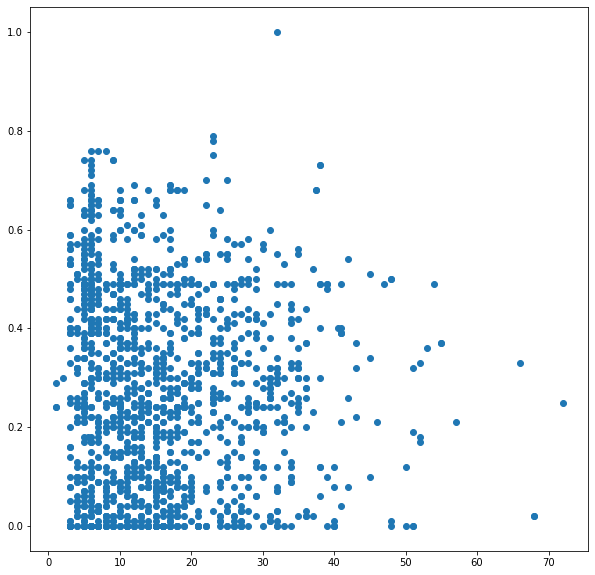

free sulfur dioxide и residual sugar :


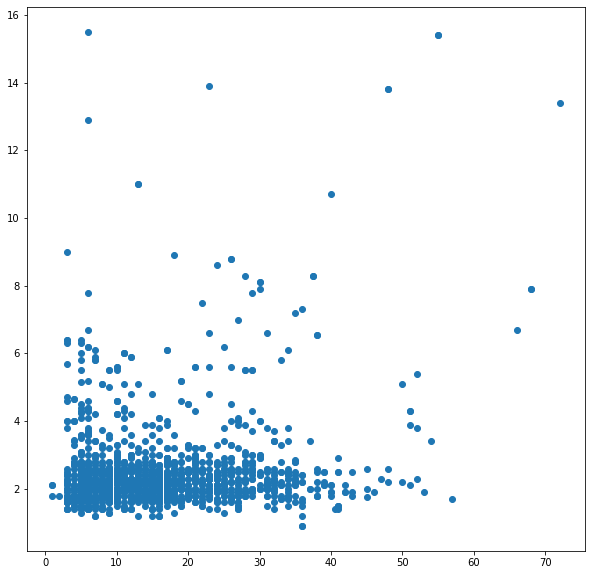

free sulfur dioxide и chlorides :


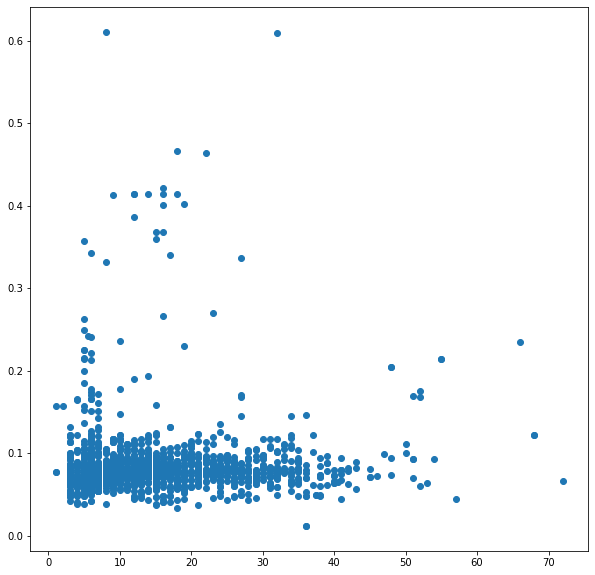

free sulfur dioxide и total sulfur dioxide :


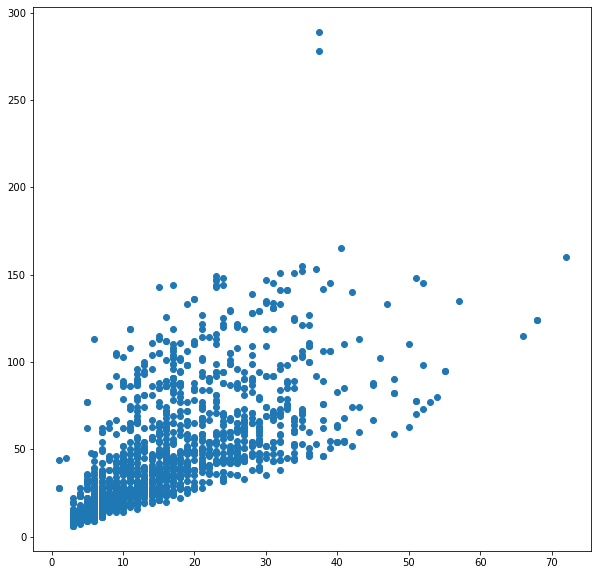

free sulfur dioxide и density :


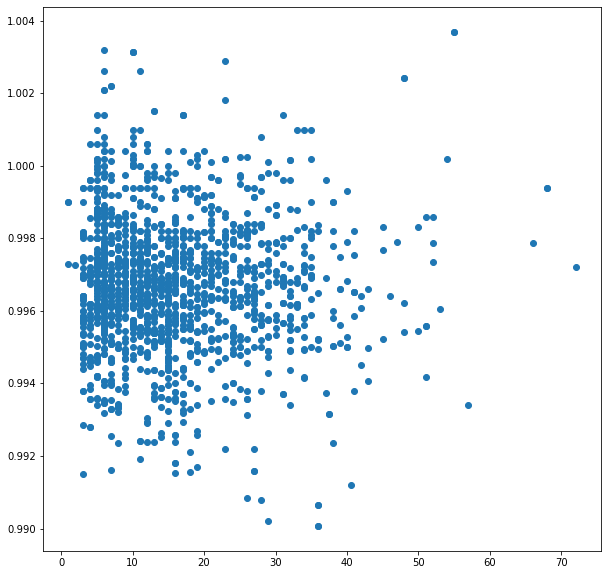

free sulfur dioxide и pH :


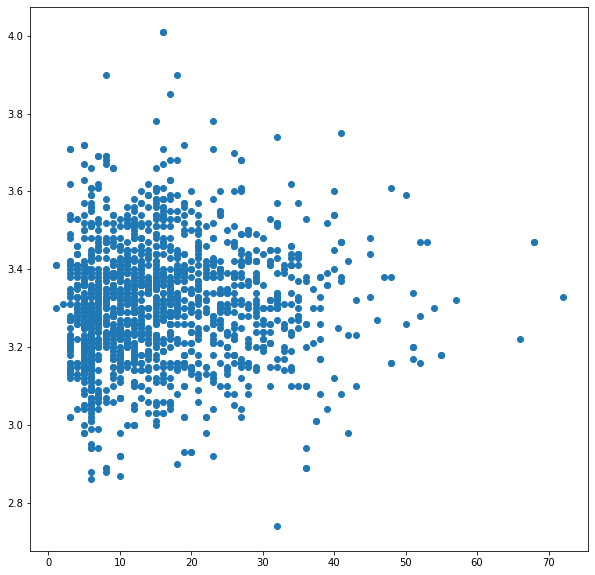

free sulfur dioxide и sulphates :


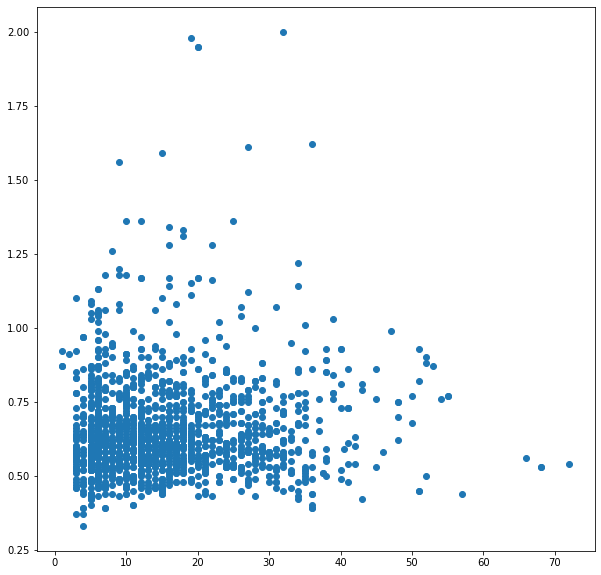

free sulfur dioxide и alcohol :


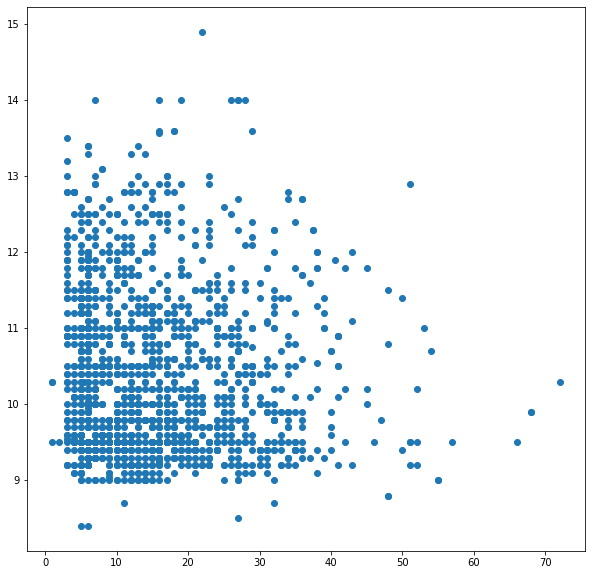

free sulfur dioxide и quality :


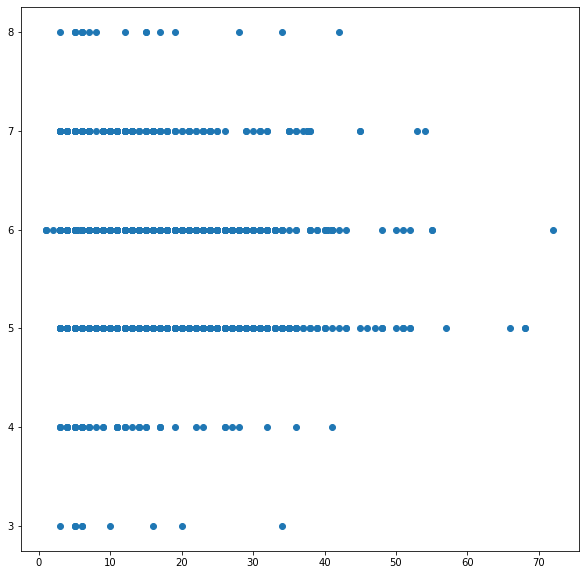

total sulfur dioxide и fixed acidity :


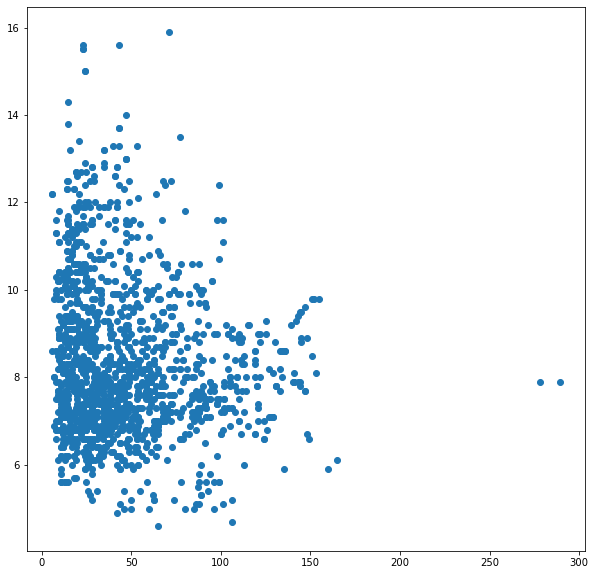

total sulfur dioxide и volatile acidity :


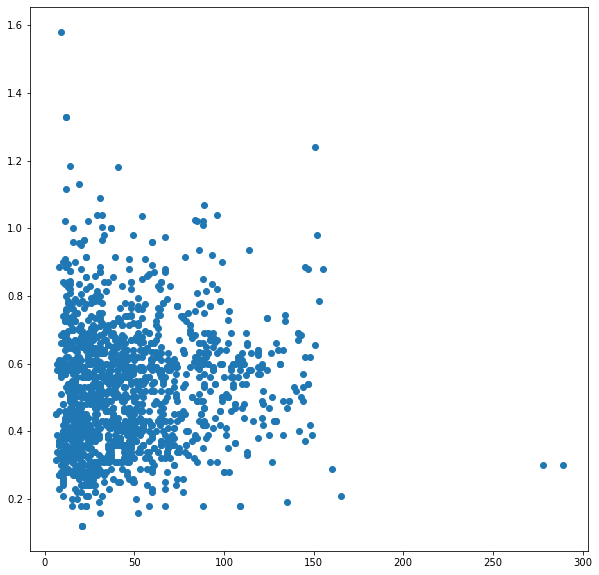

total sulfur dioxide и citric acid :


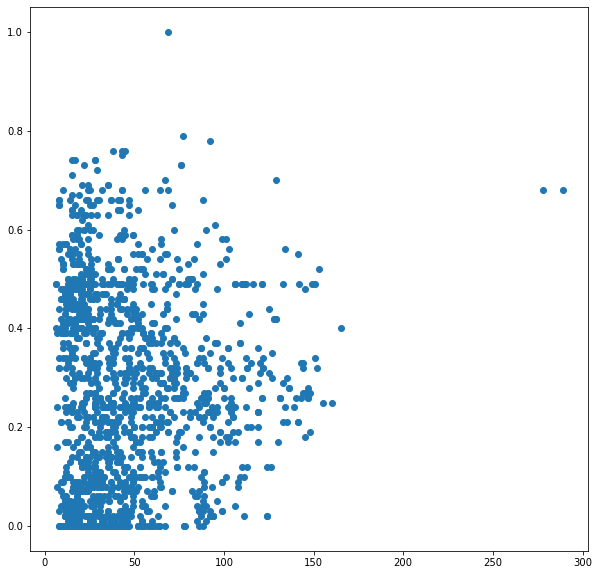

total sulfur dioxide и residual sugar :


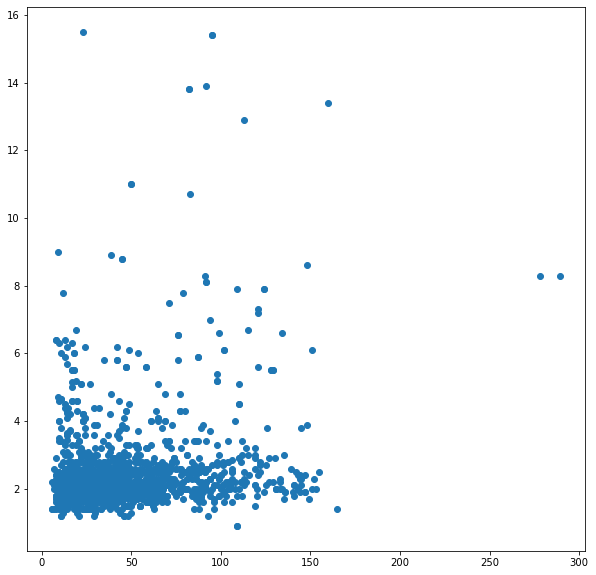

total sulfur dioxide и chlorides :


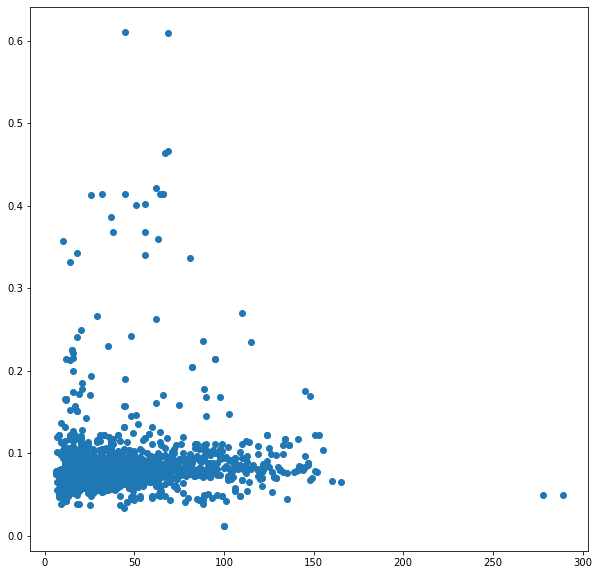

total sulfur dioxide и free sulfur dioxide :


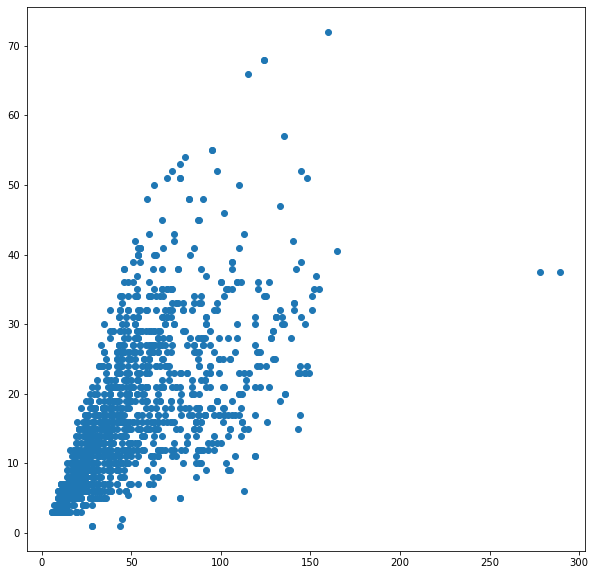

total sulfur dioxide и density :


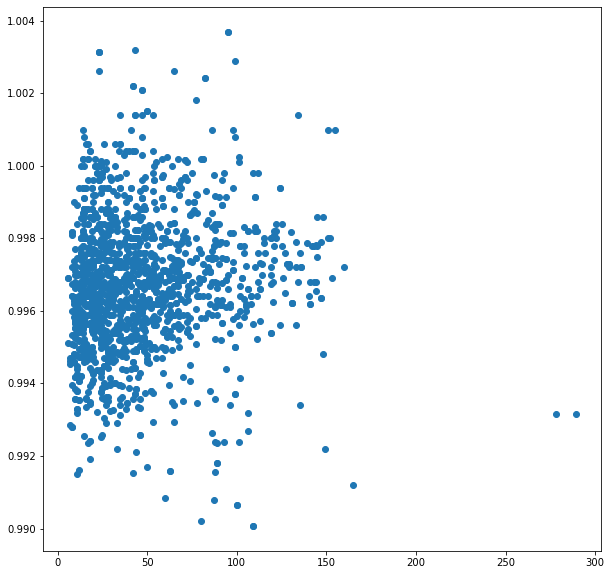

total sulfur dioxide и pH :


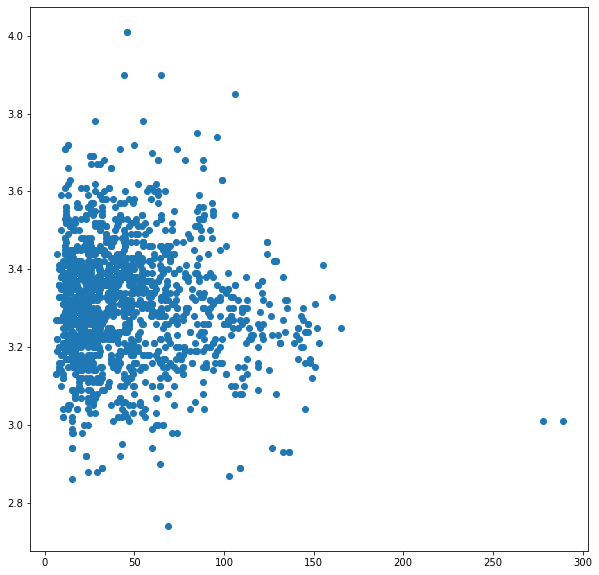

total sulfur dioxide и sulphates :


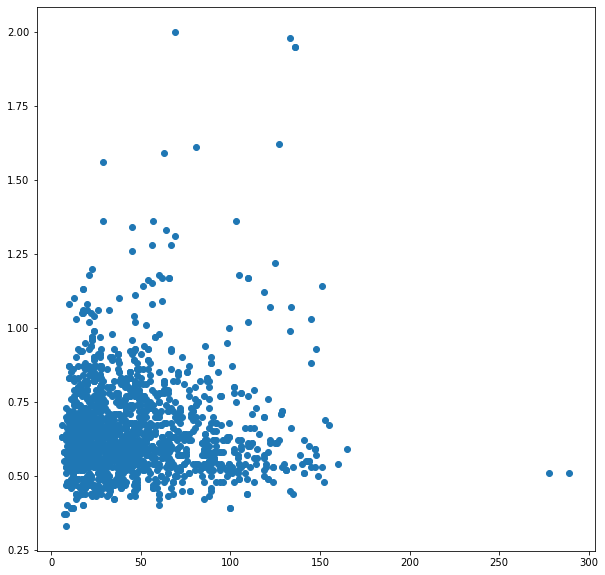

total sulfur dioxide и alcohol :


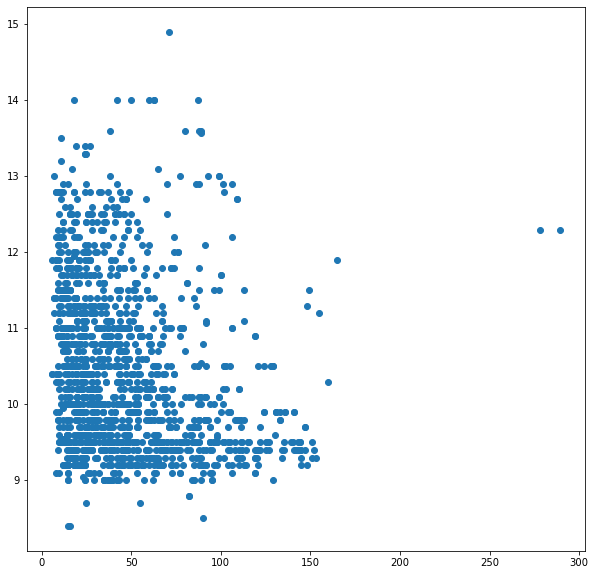

total sulfur dioxide и quality :


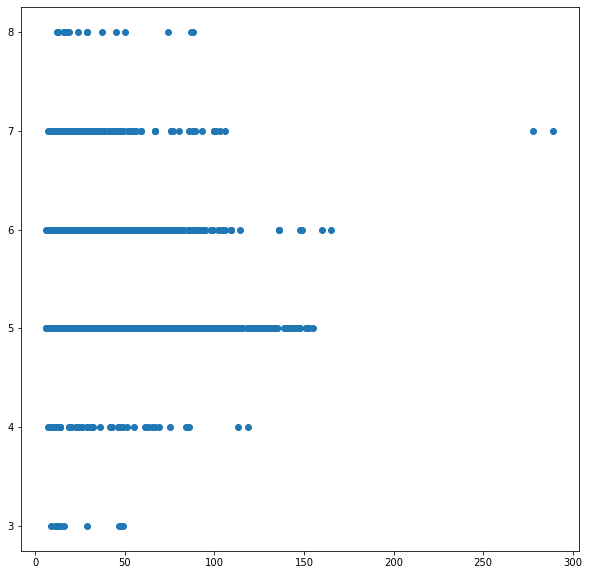

density и fixed acidity :


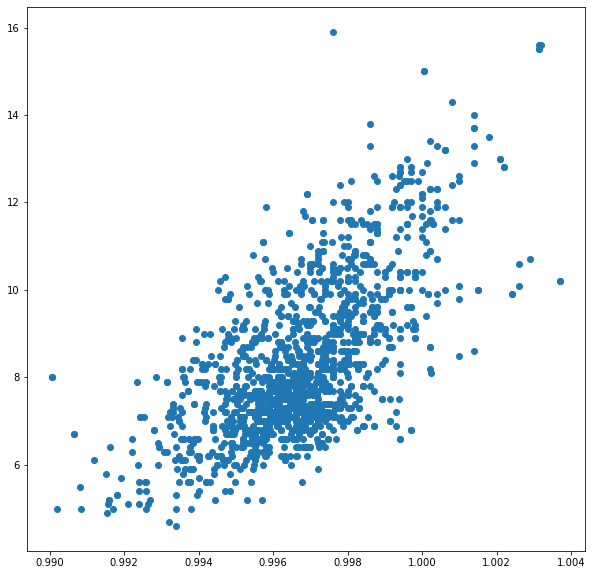

density и volatile acidity :


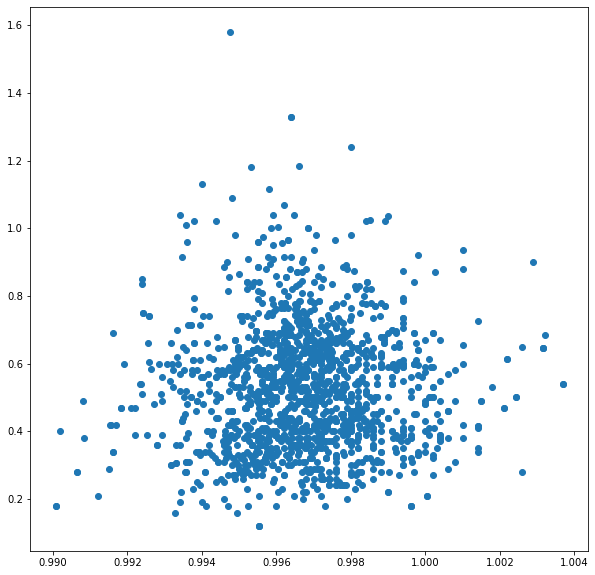

density и citric acid :


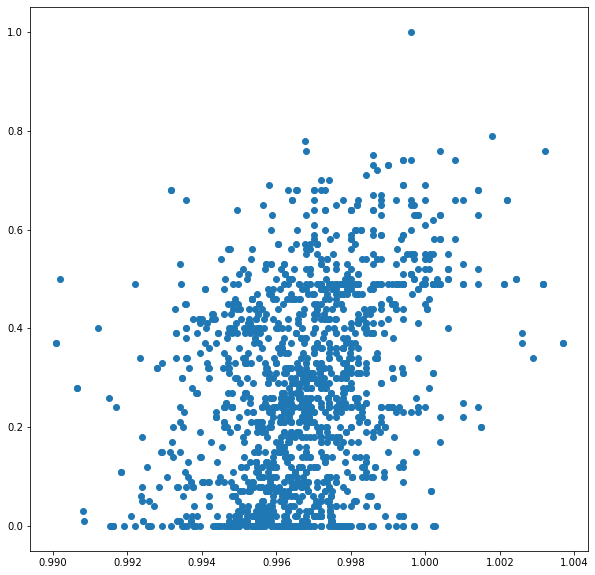

density и residual sugar :


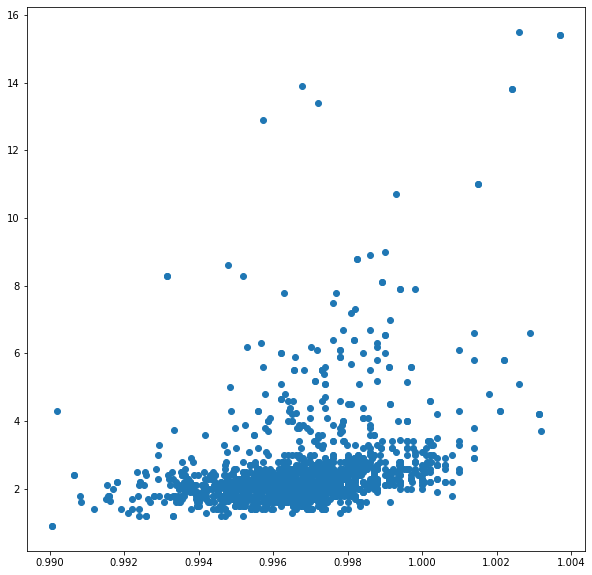

density и chlorides :


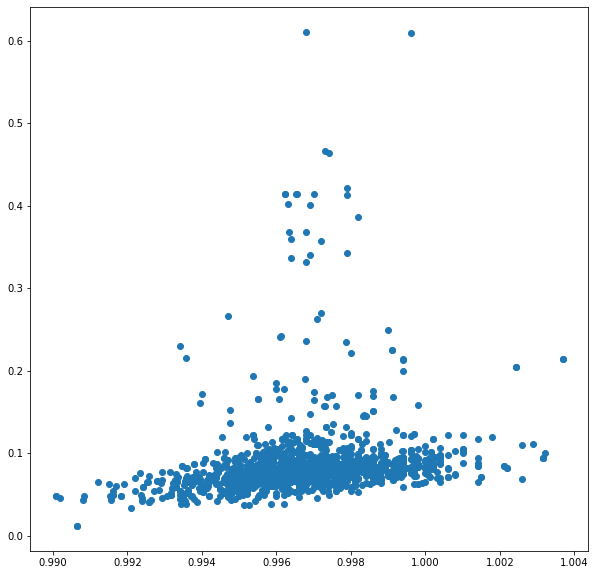

density и free sulfur dioxide :


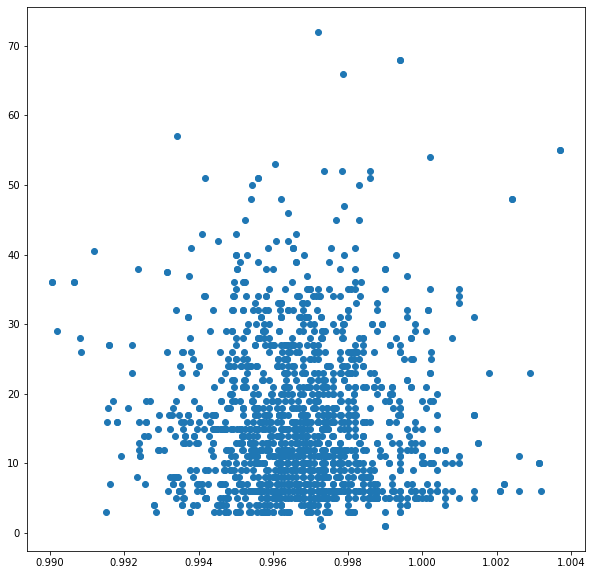

density и total sulfur dioxide :


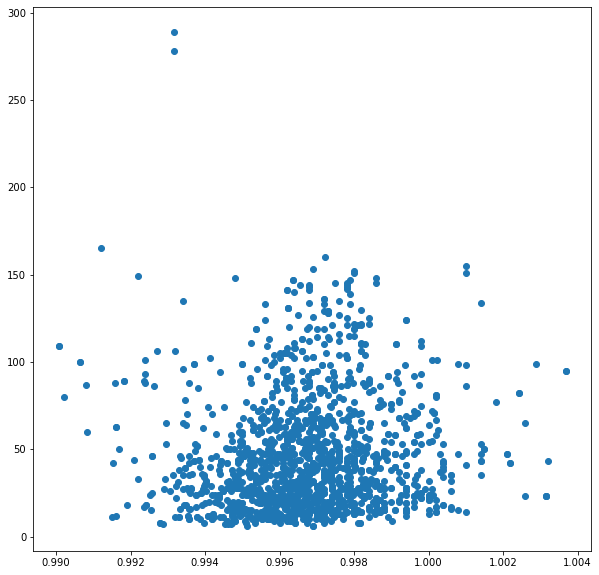

density и pH :


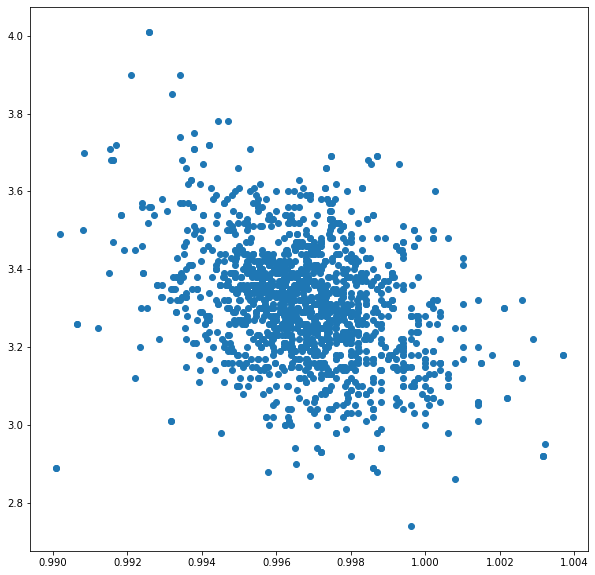

density и sulphates :


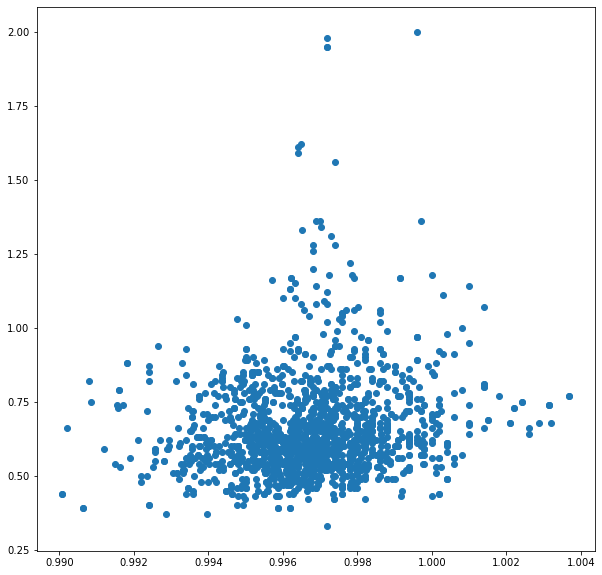

density и alcohol :


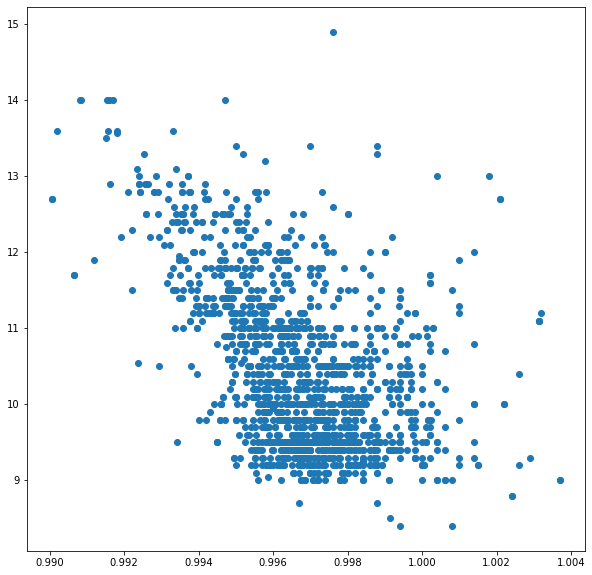

density и quality :


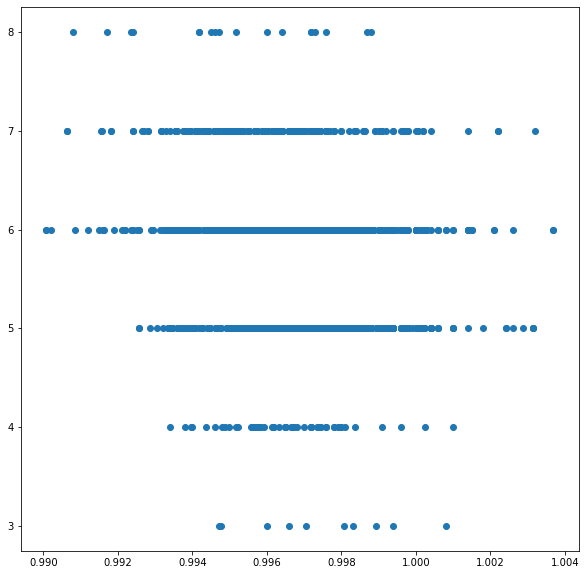

pH и fixed acidity :


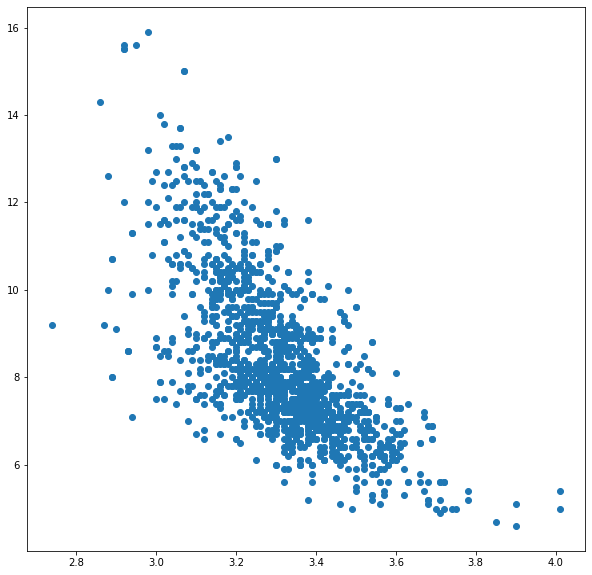

pH и volatile acidity :


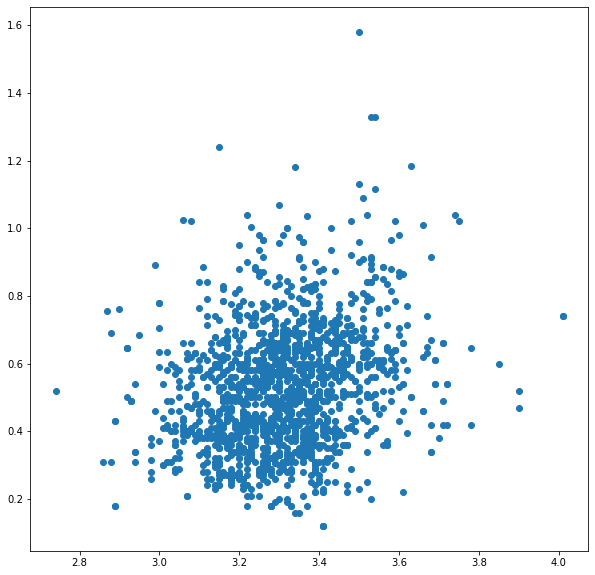

pH и citric acid :


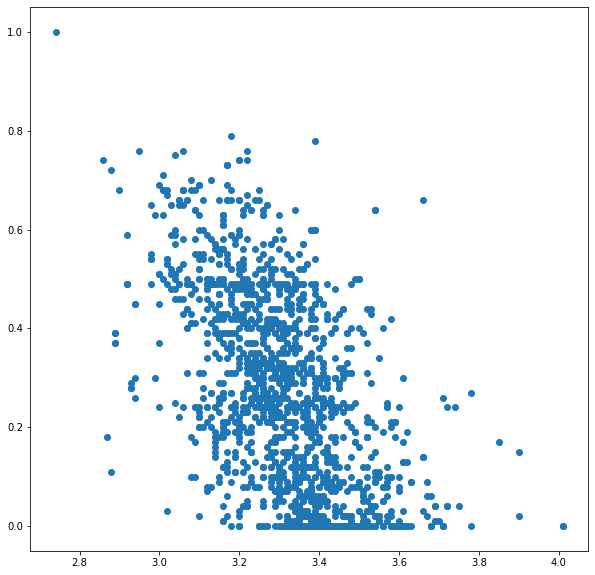

pH и residual sugar :


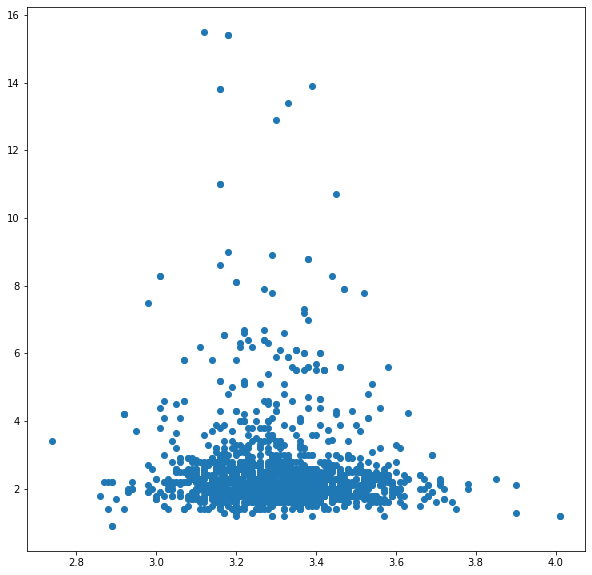

pH и chlorides :


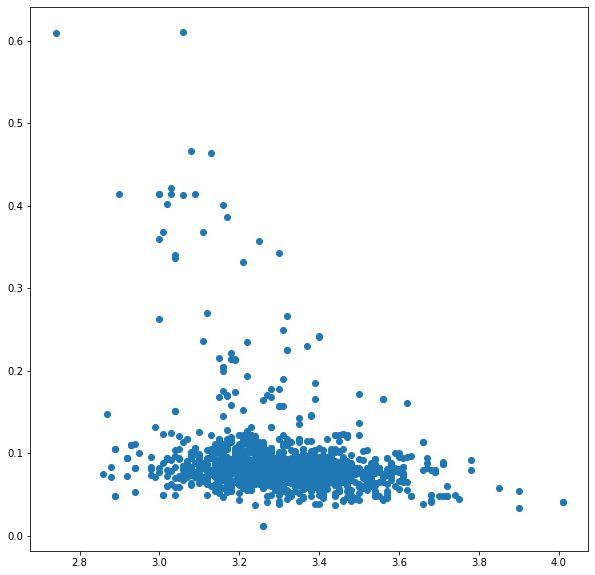

pH и free sulfur dioxide :


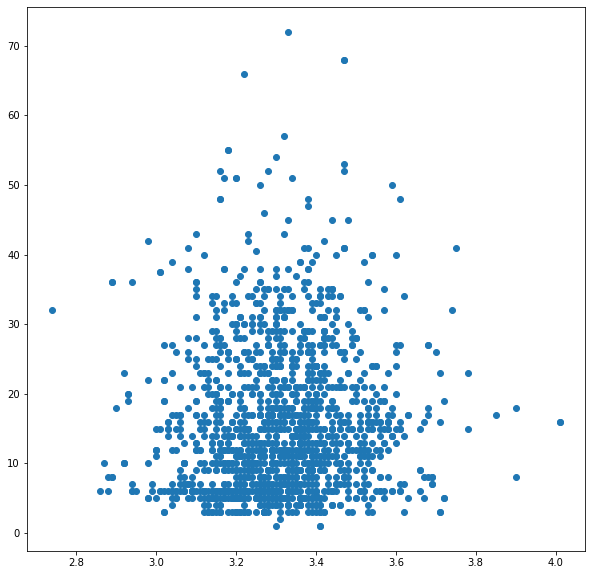

pH и total sulfur dioxide :


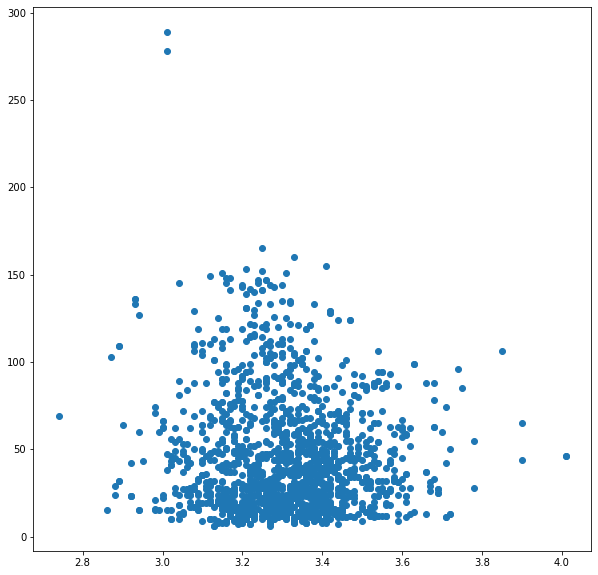

pH и density :


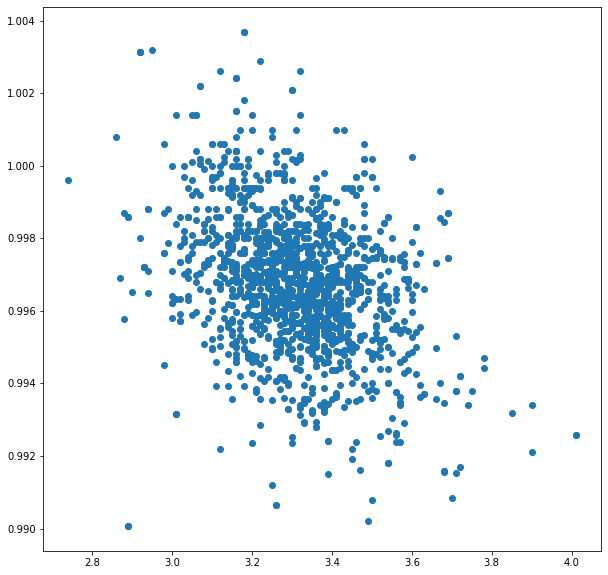

pH и sulphates :


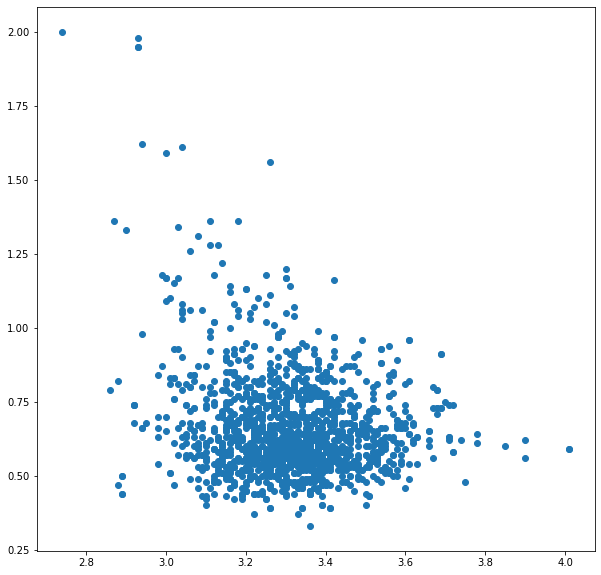

pH и alcohol :


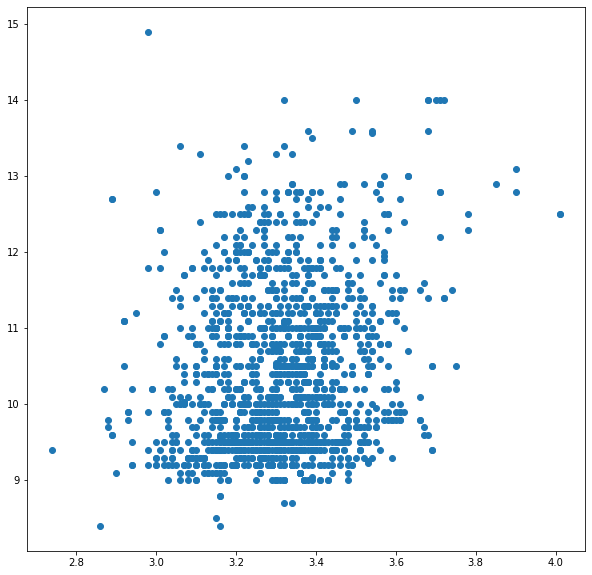

pH и quality :


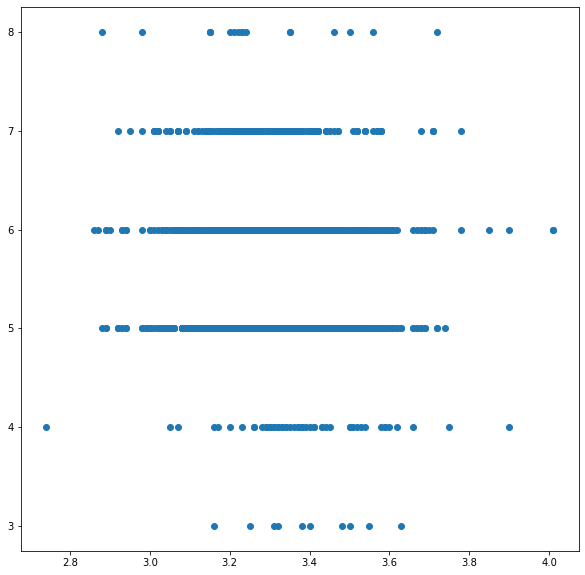

sulphates и fixed acidity :


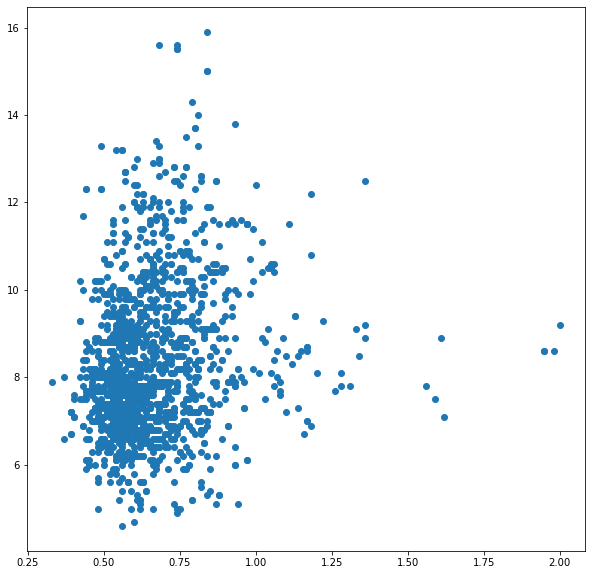

sulphates и volatile acidity :


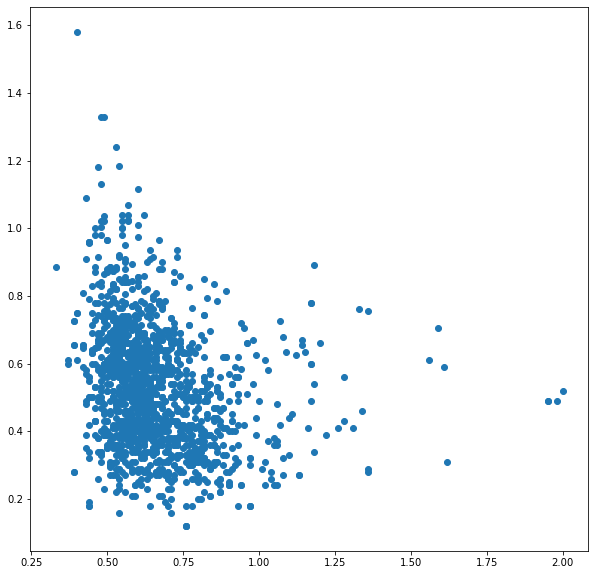

sulphates и citric acid :


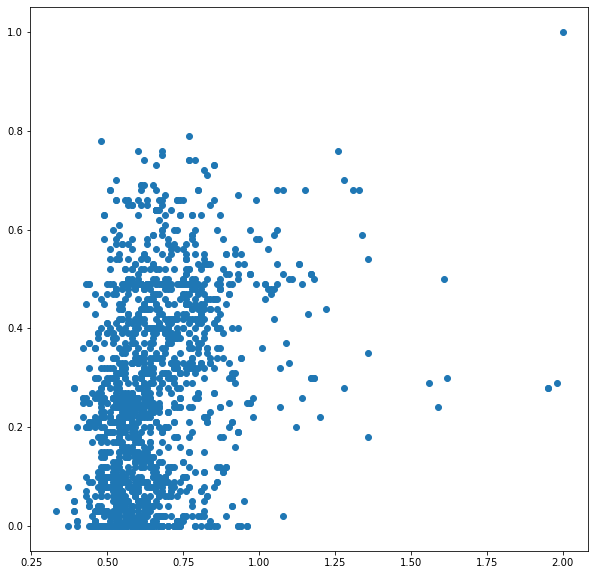

sulphates и residual sugar :


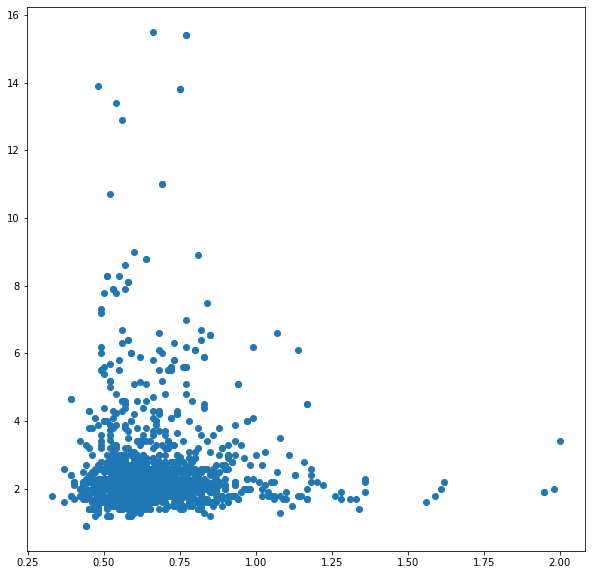

sulphates и chlorides :


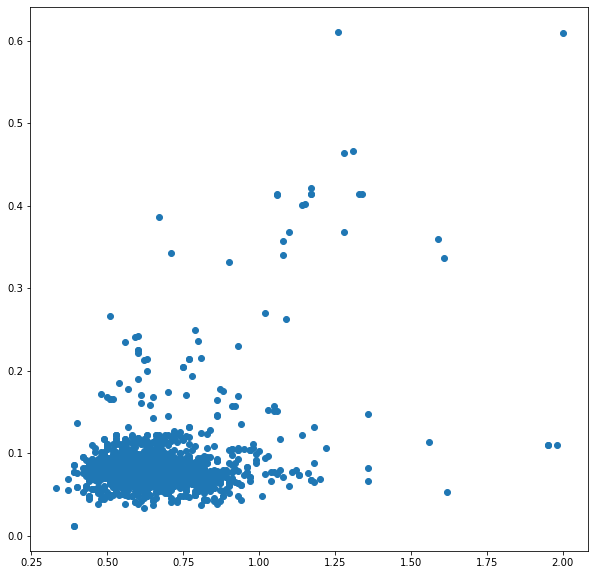

sulphates и free sulfur dioxide :


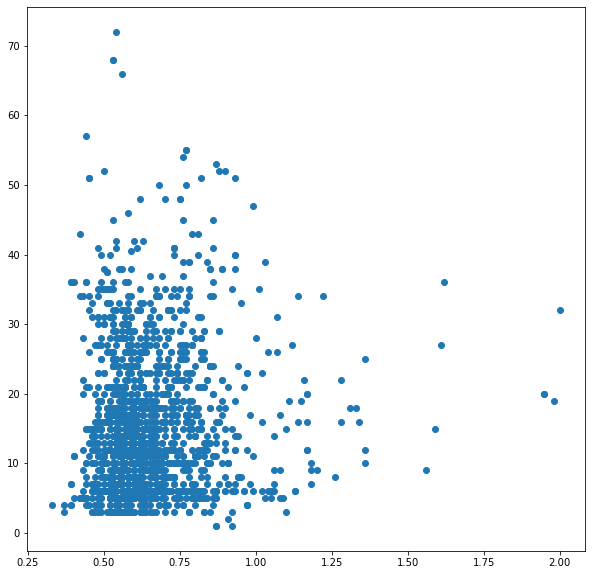

sulphates и total sulfur dioxide :


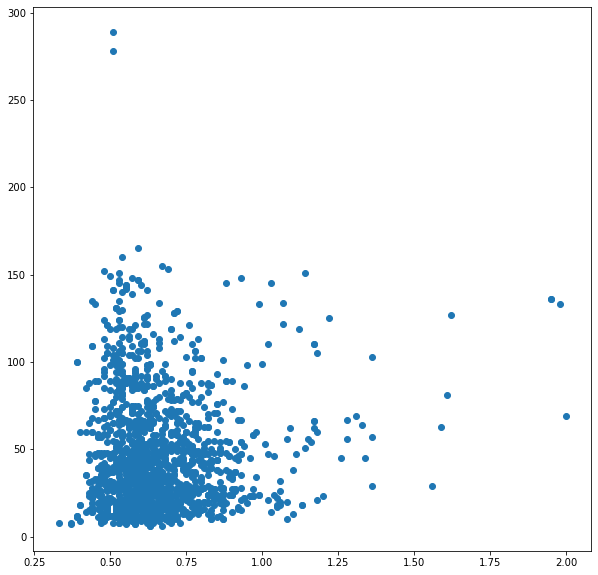

sulphates и density :


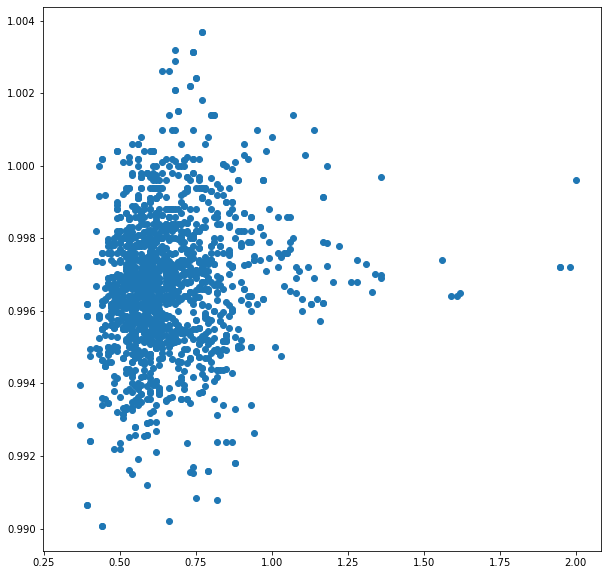

sulphates и pH :


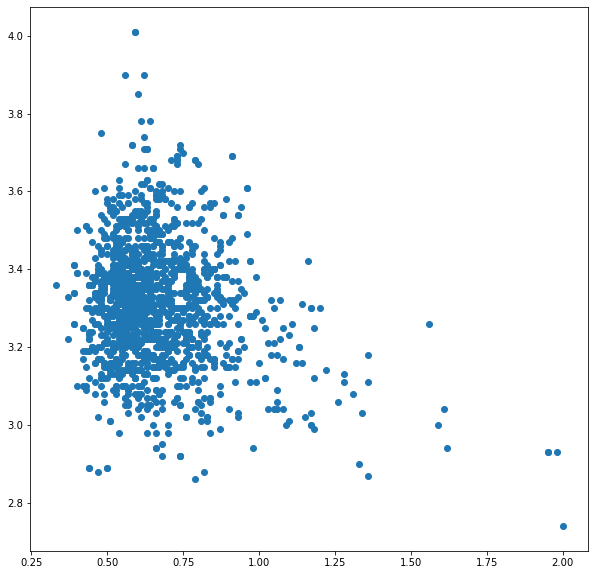

sulphates и alcohol :


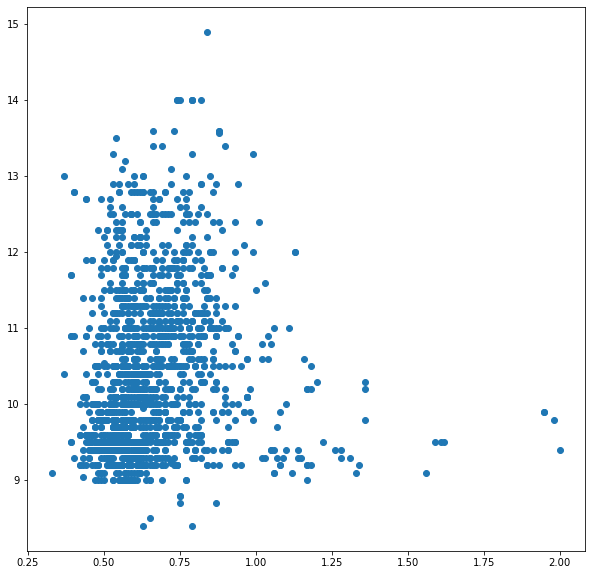

sulphates и quality :


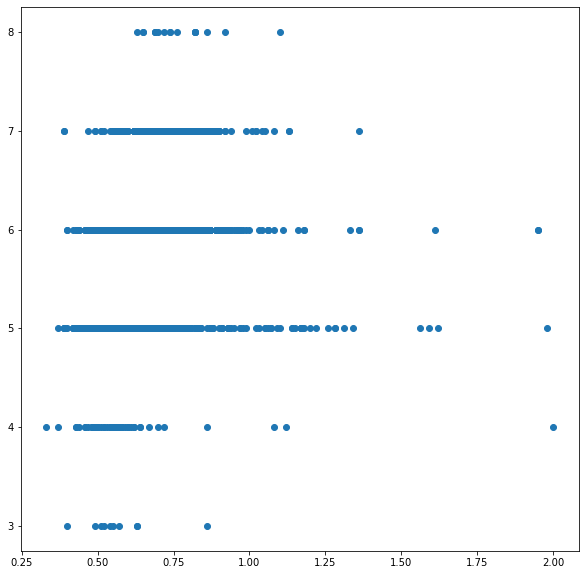

alcohol и fixed acidity :


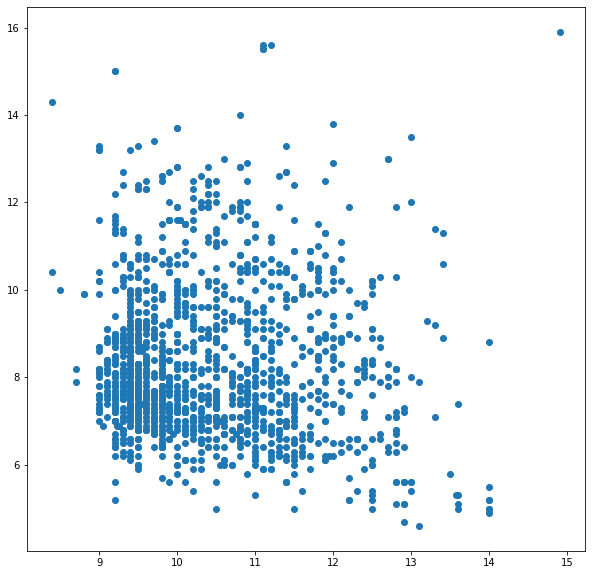

alcohol и volatile acidity :


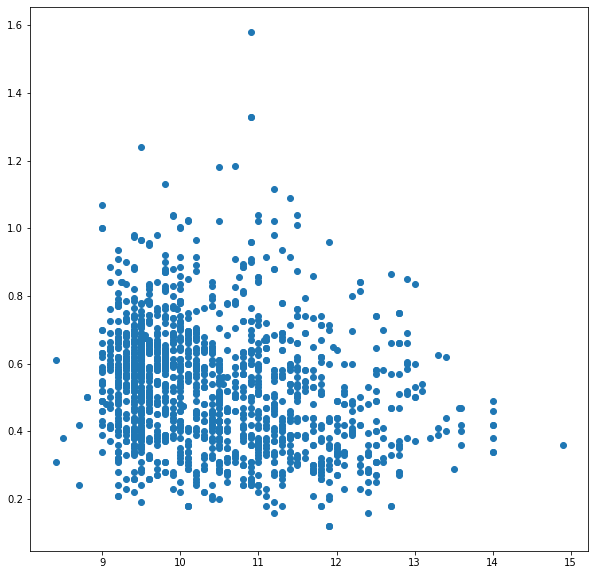

alcohol и citric acid :


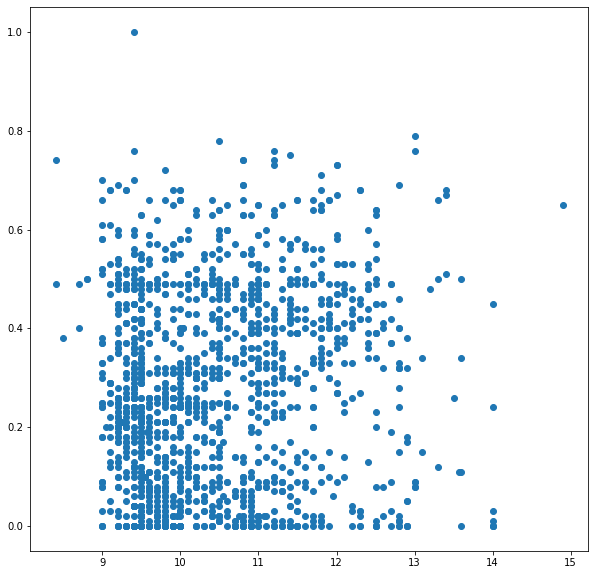

alcohol и residual sugar :


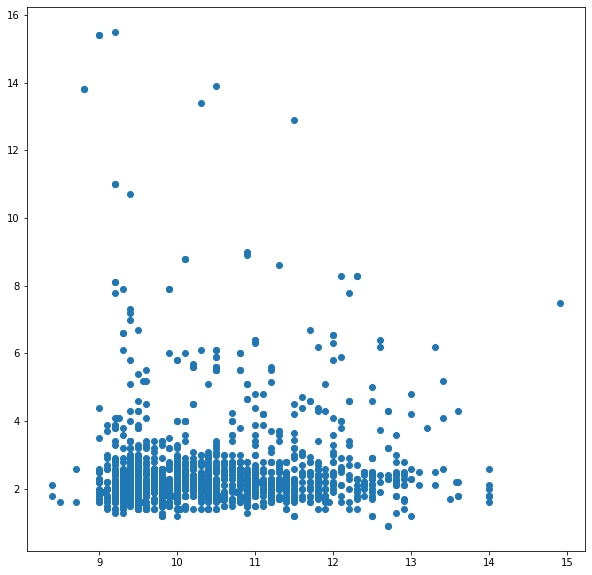

alcohol и chlorides :


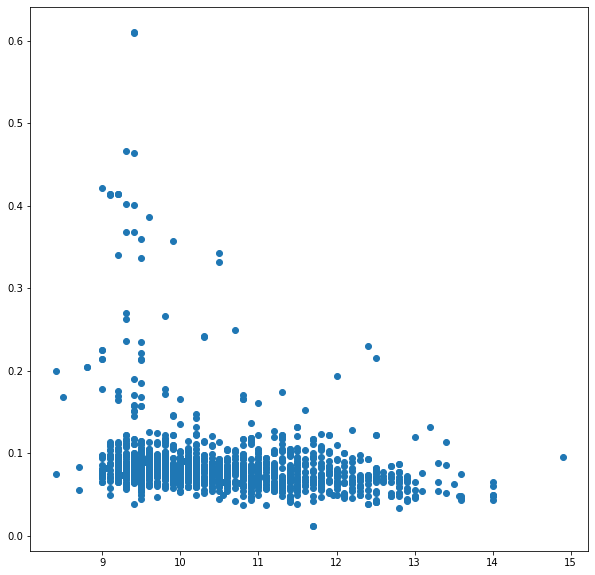

alcohol и free sulfur dioxide :


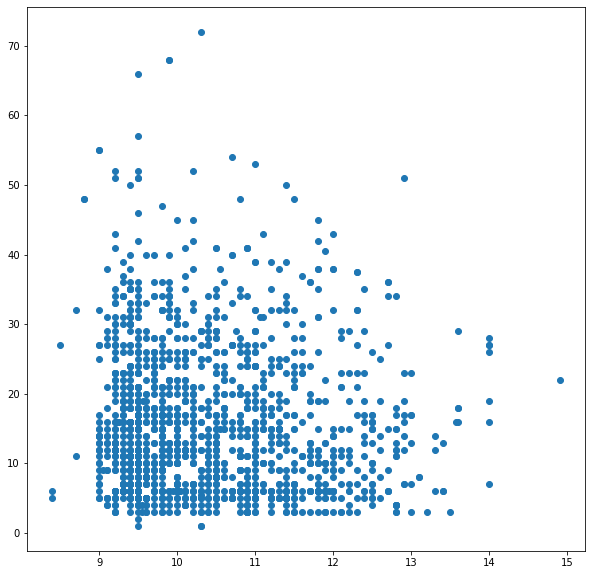

alcohol и total sulfur dioxide :


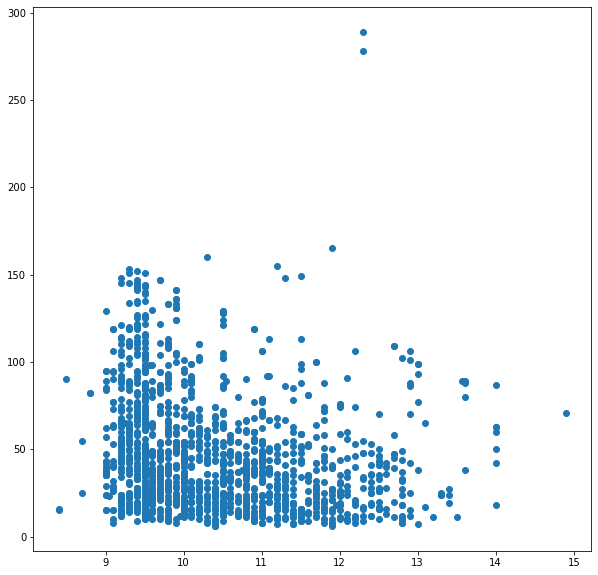

alcohol и density :


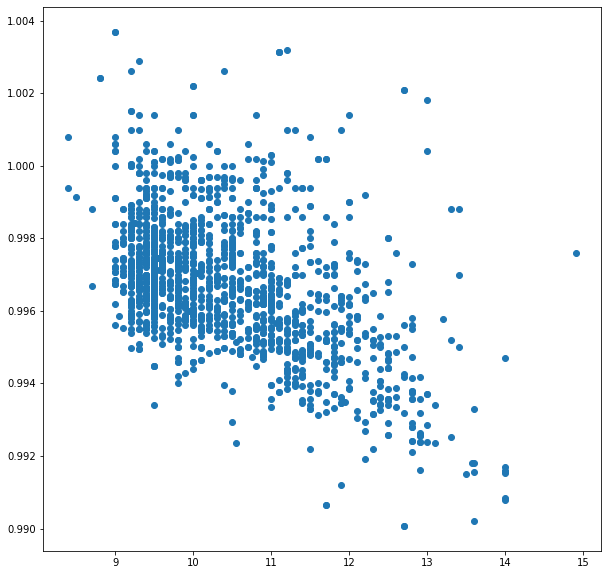

alcohol и pH :


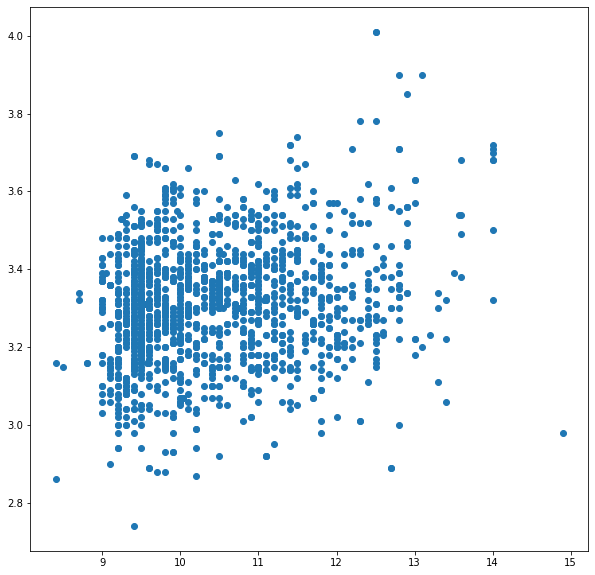

alcohol и sulphates :


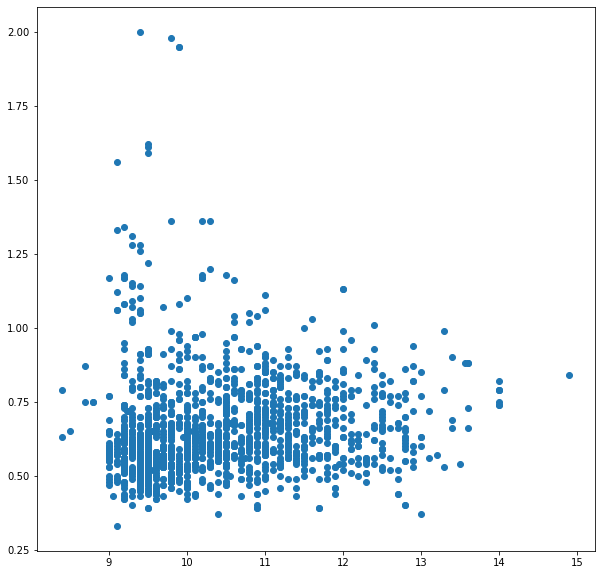

alcohol и quality :


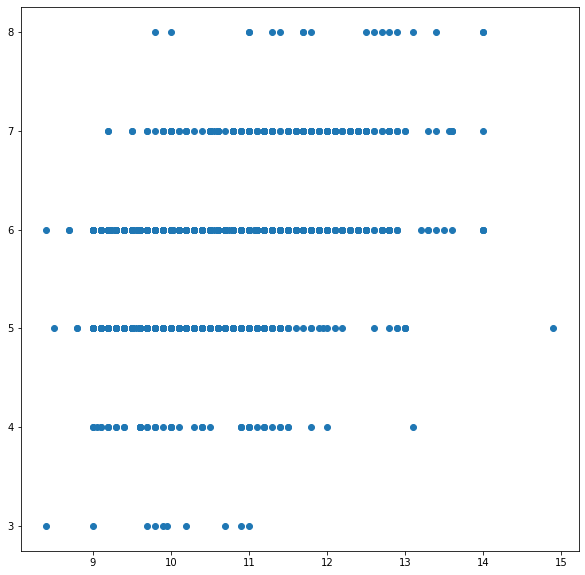

quality и fixed acidity :


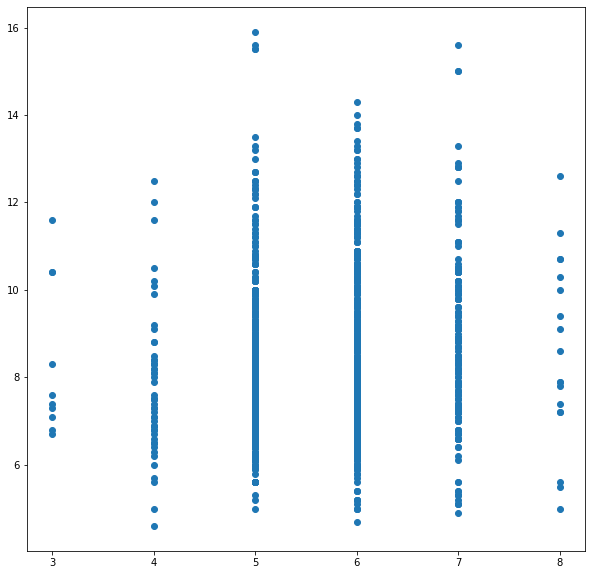

quality и volatile acidity :


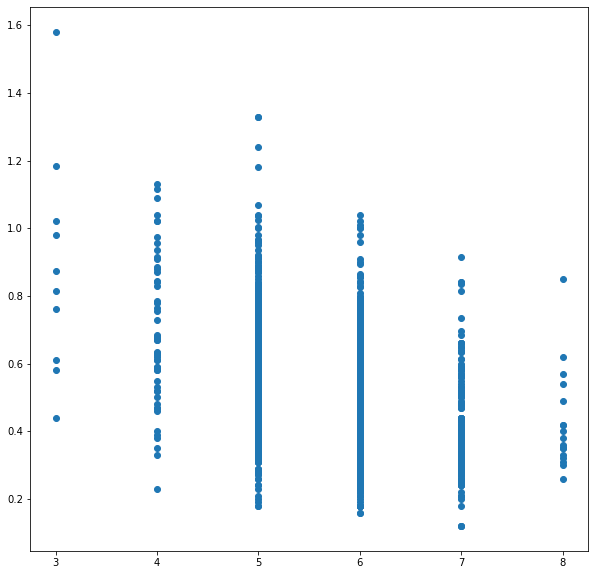

quality и citric acid :


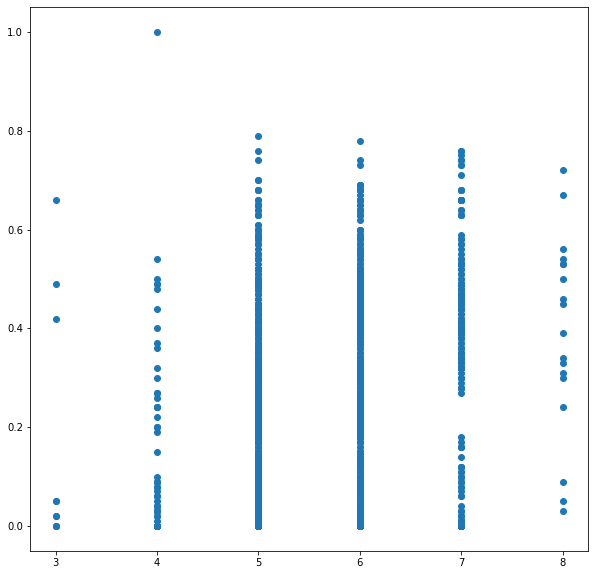

quality и residual sugar :


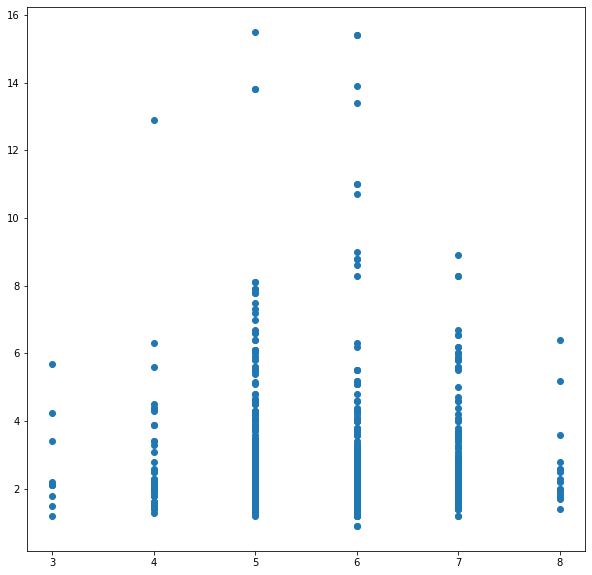

quality и chlorides :


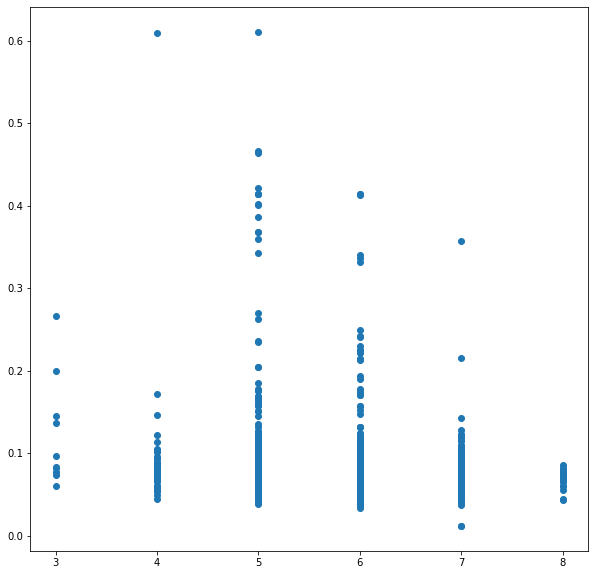

quality и free sulfur dioxide :


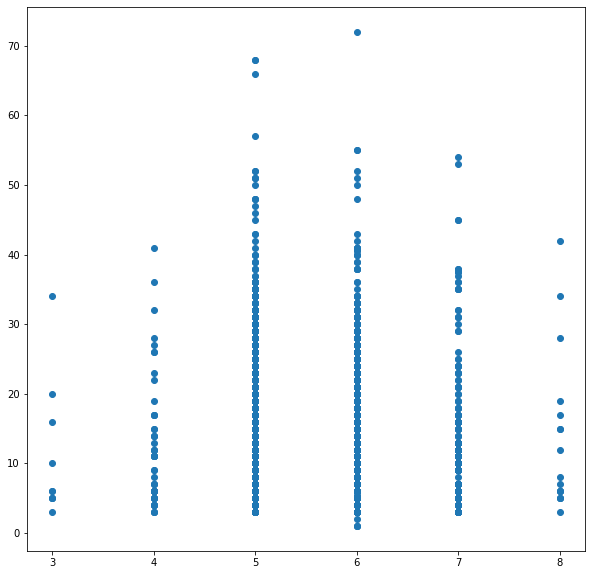

quality и total sulfur dioxide :


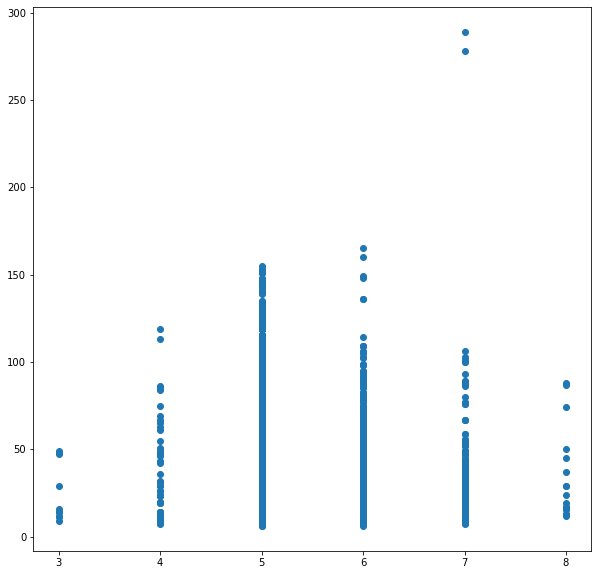

quality и density :


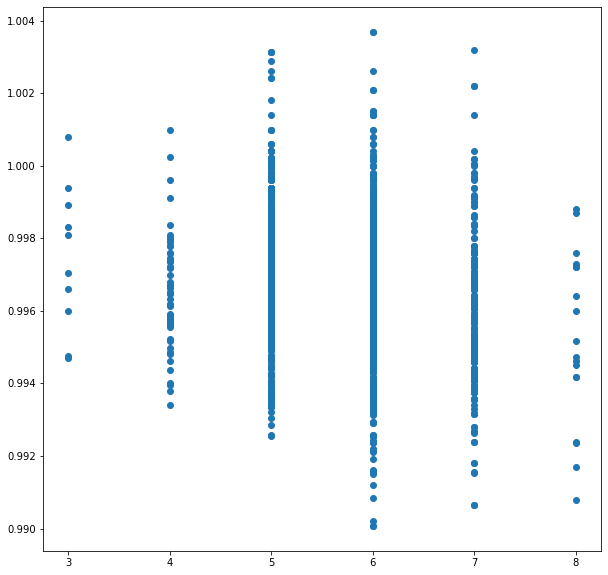

quality и pH :


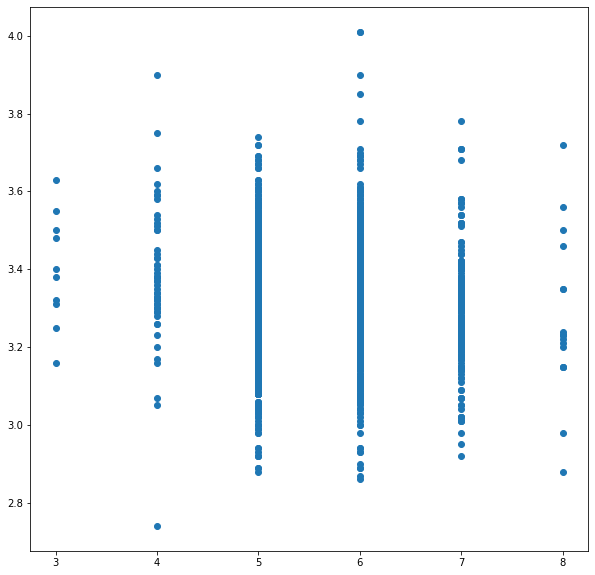

quality и sulphates :


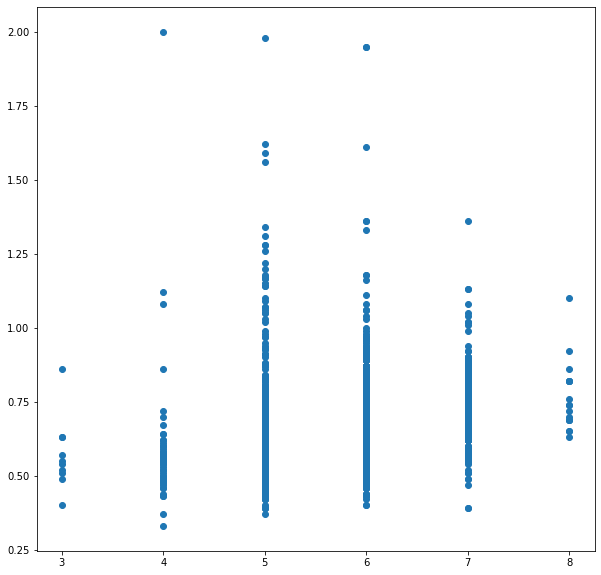

quality и alcohol :


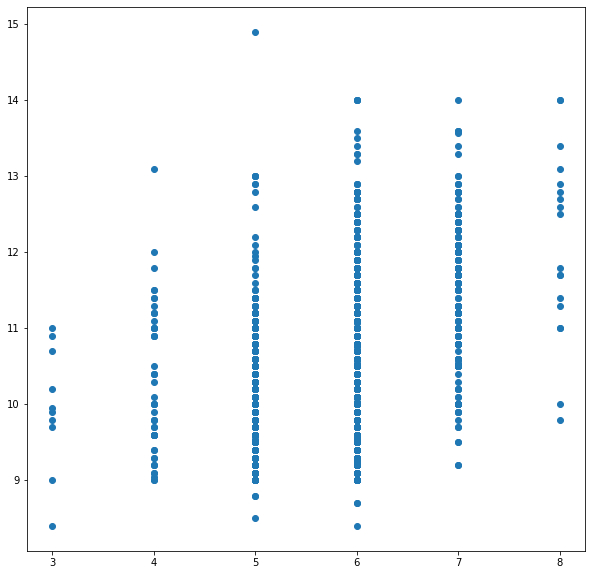

In [141]:
visualization(df)

## Предобработка:

In [294]:
df['quality'] = df['quality'].apply(lambda x: 'bad wine' if x < 6.5 else 'good wine')
[value for value in df['quality']]

['bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'good wine',
 'good wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'good wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'good wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'good wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad wine',
 'bad w

In [295]:
# Создание нового признака
df['no_free_sulfur_dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide','no_free_sulfur_dioxide','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,no_free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,23.0,34.0,0.99780,3.51,0.56,9.4,bad wine
1,7.8,0.880,0.00,2.6,0.098,25.0,42.0,67.0,0.99680,3.20,0.68,9.8,bad wine
2,7.8,0.760,0.04,2.3,0.092,15.0,39.0,54.0,0.99700,3.26,0.65,9.8,bad wine
3,11.2,0.280,0.56,1.9,0.075,17.0,43.0,60.0,0.99800,3.16,0.58,9.8,bad wine
4,7.4,0.700,0.00,1.9,0.076,11.0,23.0,34.0,0.99780,3.51,0.56,9.4,bad wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,12.0,44.0,0.99490,3.45,0.58,10.5,bad wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,12.0,51.0,0.99512,3.52,0.76,11.2,bad wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,11.0,40.0,0.99574,3.42,0.75,11.0,bad wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,12.0,44.0,0.99547,3.57,0.71,10.2,bad wine


In [296]:
df['quality'] = LabelEncoder().fit_transform(df['quality'])
df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [297]:
for value in df:
    if value != 'quality':
        df[value] = StandardScaler().fit_transform(df[value].values.reshape(-1,1))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,no_free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.280720,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.421739,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.310825,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.458711,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.280720,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.687407,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,-0.687407,0.137820,-0.862162,1.353436,0.601055,0.729364,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.724379,-0.196679,-0.533554,0.705508,0.542042,0.541630,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.687407,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           1599 non-null   float64
 1   volatile acidity        1599 non-null   float64
 2   citric acid             1599 non-null   float64
 3   residual sugar          1599 non-null   float64
 4   chlorides               1599 non-null   float64
 5   free sulfur dioxide     1599 non-null   float64
 6   no_free_sulfur_dioxide  1599 non-null   float64
 7   total sulfur dioxide    1599 non-null   float64
 8   density                 1599 non-null   float64
 9   pH                      1599 non-null   float64
 10  sulphates               1599 non-null   float64
 11  alcohol                 1599 non-null   float64
 12  quality                 1599 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


## Найдем самую лучшую модель SVC:

In [311]:
X = df.drop('quality',axis=1)
y = df['quality']
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [350]:
svc = SVC(C=1,gamma='auto',kernel='rbf')
svc.fit(train_X, train_y)

SVC(C=1, gamma='auto')

In [351]:
y_pred = svc.predict(test_X)
print('Accuracy:',accuracy_score(test_y, y_pred))

Accuracy: 0.8975


In [353]:
print('Сonfusion matrix(:',confusion_matrix(test_y, y_pred))

Сonfusion matrix(: [[346   2]
 [ 39  13]]


In [374]:
cv = cross_validate(SVC(), X, y, cv = 5,
                        scoring = ('accuracy'))
print('Лучшее значение метрики:',cv['test_score'].max())

Лучшее значение метрики: 0.896875
